In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결
import numpy as np
from torch.nn import Transformer
from torch import nn
import torch
import math
from sklearn.model_selection import train_test_split
import optuna
from sklearn.metrics import mean_absolute_percentage_error ,mean_squared_error

In [2]:
#path = '~/workplace/datas/energy/'
path = '~/Desktop/workplace/datas/energy/'

In [3]:
train_df = pd.read_csv(path + 'encoded_train_df.csv', index_col=0)
test_df = pd.read_csv(path + 'encoded_test_df.csv', index_col=0)

In [4]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

In [200]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [201]:
X.shape, y.shape, X_test.shape, y_test.shape

((546336, 13), (546336,), (2016, 13), (2016,))

In [59]:
a = pd.to_datetime(train_df.index)

In [67]:
train_df['day'] = a.day_name()

In [68]:
train_df

,Year,Month,Day,Hour,기온(°C),풍속(m/s),습도(%),현지기압(hPa),지면온도(°C),강수량(mm),적설(cm),일조(hr),일사(MJ/m2),현재수요(MW),day
2018-01-01 00:00:00,2018,1,1,0,-1.298947,1.595789,55.042105,1011.750526,-1.706316,0.000000,0.034737,0.0,0.0,60955.00,Monday
2018-01-01 00:05:00,2018,1,1,0,-1.327281,1.603772,55.147368,1011.747632,-1.722982,0.000000,0.034737,0.0,0.0,60964.30,Monday
2018-01-01 00:10:00,2018,1,1,0,-1.355614,1.611754,55.252632,1011.744737,-1.739649,0.000000,0.034737,0.0,0.0,60745.90,Monday
2018-01-01 00:15:00,2018,1,1,0,-1.383947,1.619737,55.357895,1011.741842,-1.756316,0.000000,0.034737,0.0,0.0,60170.50,Monday
2018-01-01 00:20:00,2018,1,1,0,-1.412281,1.627719,55.463158,1011.738947,-1.772982,0.000000,0.034737,0.0,0.0,60067.70,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 23:35:00,2023,3,12,23,1.765000,5.063684,46.180702,1010.276667,1.134386,0.025482,0.011491,0.0,0.0,60235.18,Sunday
2023-03-12 23:40:00,2023,3,12,23,1.720000,5.050526,46.045614,1010.288070,1.095088,0.029123,0.011930,0.0,0.0,60106.61,Sunday
2023-03-12 23:45:00,2023,3,12,23,1.675000,5.037368,45.910526,1010.299474,1.055789,0.032763,0.012368,0.0,0.0,59725.49,Sunday
2023-03-12 23:50:00,2023,3,12,23,1.630000,5.024211,45.775439,1010.310877,1.016491,0.036404,0.012807,0.0,0.0,59485.58,Sunday


# mRMR

In [72]:
#mRMR
from mrmr import mrmr_classif, mrmr_regression
selected_features = mrmr_regression(X=X, y=y, K=15, return_scores=True)

100%|███████████████████████████████████████████| 13/13 [00:12<00:00,  1.01it/s]


In [76]:
selected_features

(['Hour',
  '적설(cm)',
  '일조(hr)',
  '풍속(m/s)',
  'Year',
  '습도(%)',
  '기온(°C)',
  '일사(MJ/m2)',
  'Day',
  '현지기압(hPa)',
  'Month',
  '지면온도(°C)',
  '강수량(mm)'],
 Year          2908.459624
 Month         1639.148897
 Day            164.969512
 Hour         66378.239550
 기온(°C)        3948.509000
 풍속(m/s)      22671.733192
 습도(%)        25212.169310
 현지기압(hPa)     3293.722139
 지면온도(°C)       847.024560
 강수량(mm)         45.675827
 적설(cm)       42893.801053
 일조(hr)       12483.013488
 일사(MJ/m2)     6379.852491
 dtype: float64,
                Year     Month       Day      Hour    기온(°C)   풍속(m/s)  \
 Year       0.001000  0.001000  0.001000  0.001000  0.001000  0.020088   
 Month      0.098493  0.001000  0.018329  0.001000  0.268855  0.139086   
 Day        0.015768  0.001000  0.001000  0.001000  0.014293  0.011434   
 Hour       0.001000  0.001000  0.001000  0.001000  0.001000  0.001000   
 기온(°C)     0.070079  0.001000  0.001000  0.133693  0.001000  0.001606   
 풍속(m/s)    0.001000  0.001000

In [90]:
mrmr = []

for i , j in enumerate(selected_features[0]):
    mrmr.append([(i+1),j])

In [128]:
mrmr = pd.DataFrame(mrmr, columns=['rank', 'features'])

# SAHP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


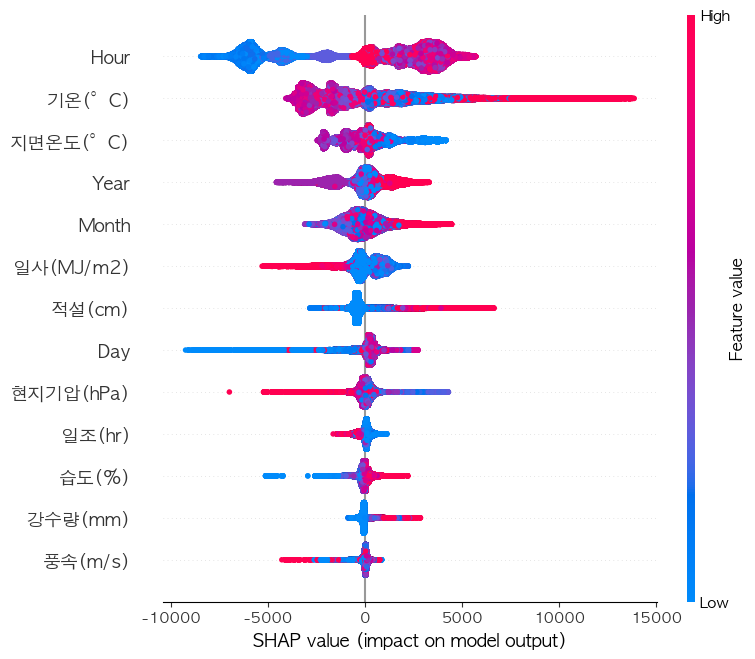

In [35]:
import shap
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(X, y)


explainer = shap.Explainer(model)



shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

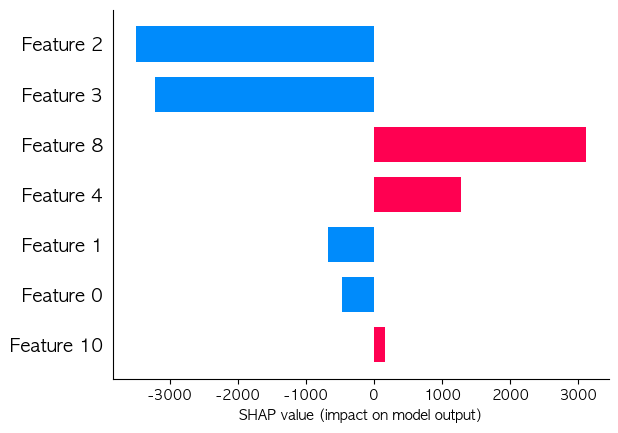

In [96]:
shap.bar_plot(shap_values[0])

In [112]:
import numpy as np

# Calculate mean absolute SHAP values
mean_shap_values = np.mean(np.abs(shap_values), axis=0)

# Print feature importance
shap = []
for feature_name, mean_value in zip(X.keys(), mean_shap_values):
    print(f"{feature_name}: {mean_value}")
    shap.append([mean_value,feature_name])


Year: 845.3539762089192
Month: 756.901857107821
Day: 485.22956731564994
Hour: 3393.7727346934494
기온(°C): 2293.5181724824206
풍속(m/s): 97.46997985704144
습도(%): 194.7139467855072
현지기압(hPa): 232.39807080586172
지면온도(°C): 964.3186486055697
강수량(mm): 165.10057191522782
적설(cm): 651.8193713115915
일조(hr): 198.27233434459654
일사(MJ/m2): 700.3101475161301


In [114]:
shap = pd.DataFrame(shap, columns=['value', 'features'])

In [119]:
shap.sort_values('value', ascending=False, inplace=True)

In [121]:
shap['rank'] = [i for i in range(1, len(shap) + 1)]

In [126]:
shap.rename(columns={'rank':'shap_rank'}, inplace=True)

In [204]:
mrmr

,rank
features,
Hour,1
적설(cm),2
일조(hr),3
풍속(m/s),4
Year,5
습도(%),6
기온(°C),7
일사(MJ/m2),8
Day,9


In [145]:
mrmr.set_index(['features'], inplace=True)
shap.set_index(['features'], inplace=True)

In [205]:
shap

,value,shap_rank
features,,
Hour,3393.772735,1
기온(°C),2293.518172,2
지면온도(°C),964.318649,3
Year,845.353976,4
Month,756.901857,5
일사(MJ/m2),700.310148,6
적설(cm),651.819371,7
Day,485.229567,8
현지기압(hPa),232.398071,9


In [206]:
merge_df = pd.merge(mrmr, shap, left_index=True, right_index=True)
merge_df.drop('value', axis=1, inplace=True)

In [207]:
merge_df['sum'] = (merge_df['rank'] ** 2) + (merge_df['shap_rank'] **2)

In [208]:
merge_df.sort_values('sum', ascending=True, inplace=True)

In [209]:
merge_df

,rank,shap_rank,sum
features,,,
Hour,1,1,2
Year,5,4,41
적설(cm),2,7,53
기온(°C),7,2,53
일사(MJ/m2),8,6,100
일조(hr),3,10,109
Day,9,8,145
Month,11,5,146
지면온도(°C),12,3,153


# 인덱스 순위

In [210]:
merge_df.index

Index(['Hour', 'Year', '적설(cm)', '기온(°C)', '일사(MJ/m2)', '일조(hr)', 'Day',
       'Month', '지면온도(°C)', '습도(%)', '현지기압(hPa)', '풍속(m/s)', '강수량(mm)'],
      dtype='object', name='features')

In [232]:
X = X[merge_df.index[:-3]]
X

,Hour,Year,적설(cm),기온(°C),일사(MJ/m2),일조(hr),Day,Month,지면온도(°C),습도(%)
2018-01-01 00:00:00,0,2018,0.034737,-1.298947,0.0,0.0,1,1,-1.706316,55.042105
2018-01-01 00:05:00,0,2018,0.034737,-1.327281,0.0,0.0,1,1,-1.722982,55.147368
2018-01-01 00:10:00,0,2018,0.034737,-1.355614,0.0,0.0,1,1,-1.739649,55.252632
2018-01-01 00:15:00,0,2018,0.034737,-1.383947,0.0,0.0,1,1,-1.756316,55.357895
2018-01-01 00:20:00,0,2018,0.034737,-1.412281,0.0,0.0,1,1,-1.772982,55.463158
...,...,...,...,...,...,...,...,...,...,...
2023-03-12 23:35:00,23,2023,0.011491,1.765000,0.0,0.0,12,3,1.134386,46.180702
2023-03-12 23:40:00,23,2023,0.011930,1.720000,0.0,0.0,12,3,1.095088,46.045614
2023-03-12 23:45:00,23,2023,0.012368,1.675000,0.0,0.0,12,3,1.055789,45.910526
2023-03-12 23:50:00,23,2023,0.012807,1.630000,0.0,0.0,12,3,1.016491,45.775439


In [213]:
X_test.shape

(2016, 13)

In [233]:
X_test = X_test.reindex(columns=merge_df.index)

X_test = X_test.iloc[:, :-3]

In [234]:
X.shape, X_test.shape, y.shape, y_test.shape

((546336, 10), (2016, 10), (546336,), (2016,))

# XGBoost

In [235]:
import xgboost as xgb


dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)


def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mape',
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'eta': trial.suggest_loguniform('eta', 0.01, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
    }

    bst = xgb.train(params, dtrain)
    preds = bst.predict(xgb.DMatrix(X_test))
    mape = mean_absolute_percentage_error(y_test, preds)
    print("MAPE: {}".format(mape))
    return mape

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

print(study.best_trial)
print(study.best_value)

[I 2023-07-18 17:12:50,337] A new study created in memory with name: no-name-c9a1816b-82a6-4e8e-bfde-3db494c44fc8
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:50,755] Trial 0 finished with value: 0.09872785251787071 and parameters: {'max_depth': 6, 'eta': 0.40013756940161876, 'gamma': 0.16521507762067372, 'subsample': 0.12270413831247973, 'colsample_bytree': 0.17854415423459208}. Best is trial 0 with value: 0.09872785251787071.


MAPE: 0.09872785251787071


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:51,434] Trial 1 finished with value: 0.09782454932476967 and parameters: {'max_depth': 5, 'eta': 0.22949060729782436, 'gamma': 0.010577830950154006, 'subsample': 0.6265594658160882, 'colsample_bytree': 0.6025342696657374}. Best is trial 1 with value: 0.09782454932476967.


MAPE: 0.09782454932476967


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:52,315] Trial 2 finished with value: 0.6485419475701117 and parameters: {'max_depth': 7, 'eta': 0.041283687463063476, 'gamma': 0.1550855561832146, 'subsample': 0.6421856867950158, 'colsample_bytree': 0.5995974070621231}. Best is trial 1 with value: 0.09782454932476967.


MAPE: 0.6485419475701117


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:52,643] Trial 3 finished with value: 0.415159412043677 and parameters: {'max_depth': 2, 'eta': 0.0802130322234808, 'gamma': 0.15713669454898535, 'subsample': 0.864900960393948, 'colsample_bytree': 0.506395539372578}. Best is trial 1 with value: 0.09782454932476967.


MAPE: 0.415159412043677


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:53,039] Trial 4 finished with value: 0.09749606953279139 and parameters: {'max_depth': 4, 'eta': 0.3340399897513996, 'gamma': 0.1983899723425822, 'subsample': 0.2651737697948954, 'colsample_bytree': 0.12048739794862008}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.09749606953279139


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:54,335] Trial 5 finished with value: 0.1781332173331985 and parameters: {'max_depth': 10, 'eta': 0.15028827995469374, 'gamma': 0.011035355667230047, 'subsample': 0.5160317185726248, 'colsample_bytree': 0.3118992675227183}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.1781332173331985


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:55,150] Trial 6 finished with value: 0.6521112044119206 and parameters: {'max_depth': 9, 'eta': 0.04089809360509826, 'gamma': 0.29254970907343525, 'subsample': 0.133508906795631, 'colsample_bytree': 0.6227768559765203}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.6521112044119206


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:55,458] Trial 7 finished with value: 0.7405300255935597 and parameters: {'max_depth': 2, 'eta': 0.0285825672153688, 'gamma': 0.010050180297154888, 'subsample': 0.29108997199276776, 'colsample_bytree': 0.7927334960599427}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.7405300255935597


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:56,251] Trial 8 finished with value: 0.1322778948396895 and parameters: {'max_depth': 5, 'eta': 0.1902004784817369, 'gamma': 0.052297995444586534, 'subsample': 0.7163956544946156, 'colsample_bytree': 0.6453609795567433}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.1322778948396895


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:56,956] Trial 9 finished with value: 0.525447361915094 and parameters: {'max_depth': 4, 'eta': 0.06105510131348925, 'gamma': 0.2355791304425973, 'subsample': 0.5443405610923423, 'colsample_bytree': 0.9110100863671227}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.525447361915094


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:57,208] Trial 10 finished with value: 0.09985057910381984 and parameters: {'max_depth': 1, 'eta': 0.98104380902246, 'gamma': 0.8323913284506091, 'subsample': 0.40184476795768714, 'colsample_bytree': 0.30885727087189396}. Best is trial 4 with value: 0.09749606953279139.


MAPE: 0.09985057910381984


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:57,679] Trial 11 finished with value: 0.09658745678332739 and parameters: {'max_depth': 4, 'eta': 0.3041789669524206, 'gamma': 0.037001079627110085, 'subsample': 0.9884449955830921, 'colsample_bytree': 0.11511382390927832}. Best is trial 11 with value: 0.09658745678332739.


MAPE: 0.09658745678332739


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:58,061] Trial 12 finished with value: 0.8684106810088615 and parameters: {'max_depth': 3, 'eta': 0.013362495538435468, 'gamma': 0.049650746767178754, 'subsample': 0.9939967590481512, 'colsample_bytree': 0.11693928988377988}. Best is trial 11 with value: 0.09658745678332739.


MAPE: 0.8684106810088615


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:12:58,884] Trial 13 finished with value: 0.08995197832576361 and parameters: {'max_depth': 7, 'eta': 0.4233459152074794, 'gamma': 0.054864687748624213, 'subsample': 0.3368343867683058, 'colsample_bytree': 0.21886944771685735}. Best is trial 13 with value: 0.08995197832576361.


MAPE: 0.08995197832576361


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:00,012] Trial 14 finished with value: 0.09139607821356241 and parameters: {'max_depth': 8, 'eta': 0.6141903639102643, 'gamma': 0.03278924905181097, 'subsample': 0.8197674683383201, 'colsample_bytree': 0.2704772377214097}. Best is trial 13 with value: 0.08995197832576361.


MAPE: 0.09139607821356241


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:01,183] Trial 15 finished with value: 0.09062263901906349 and parameters: {'max_depth': 8, 'eta': 0.7651043035383054, 'gamma': 0.027609560207410937, 'subsample': 0.7841214784010947, 'colsample_bytree': 0.3381241236534187}. Best is trial 13 with value: 0.08995197832576361.


MAPE: 0.09062263901906349


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:02,308] Trial 16 finished with value: 0.0816443324347318 and parameters: {'max_depth': 7, 'eta': 0.9740728889624514, 'gamma': 0.021049872655237542, 'subsample': 0.44949277257435644, 'colsample_bytree': 0.41143596269239663}. Best is trial 16 with value: 0.0816443324347318.


MAPE: 0.0816443324347318


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:03,241] Trial 17 finished with value: 0.08321430278998565 and parameters: {'max_depth': 7, 'eta': 0.5370164529958605, 'gamma': 0.07912339893880183, 'subsample': 0.4424735777465383, 'colsample_bytree': 0.35946298436746604}. Best is trial 16 with value: 0.0816443324347318.


MAPE: 0.08321430278998565


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:04,296] Trial 18 finished with value: 0.07761650156745603 and parameters: {'max_depth': 7, 'eta': 0.98487040472795, 'gamma': 0.09286545378186559, 'subsample': 0.5070709480394022, 'colsample_bytree': 0.42610842189878523}. Best is trial 18 with value: 0.07761650156745603.


MAPE: 0.07761650156745603


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:05,759] Trial 19 finished with value: 0.08571134253903204 and parameters: {'max_depth': 10, 'eta': 0.9999668503385709, 'gamma': 0.02162115342411443, 'subsample': 0.4675476018736525, 'colsample_bytree': 0.46799370626183345}. Best is trial 18 with value: 0.07761650156745603.


MAPE: 0.08571134253903204


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:06,696] Trial 20 finished with value: 0.07093989497459409 and parameters: {'max_depth': 6, 'eta': 0.6120933292980703, 'gamma': 0.019718292992596906, 'subsample': 0.5968161000990417, 'colsample_bytree': 0.4333253370705832}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07093989497459409


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:07,627] Trial 21 finished with value: 0.07295634237748948 and parameters: {'max_depth': 6, 'eta': 0.6473856150216548, 'gamma': 0.016838674752904913, 'subsample': 0.5805273160577514, 'colsample_bytree': 0.4220082642190418}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07295634237748948


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:08,562] Trial 22 finished with value: 0.07186392442333041 and parameters: {'max_depth': 6, 'eta': 0.5895435897531447, 'gamma': 0.016877974557469377, 'subsample': 0.5959077982195113, 'colsample_bytree': 0.4458553714114228}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07186392442333041


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:09,514] Trial 23 finished with value: 0.07561882259742929 and parameters: {'max_depth': 6, 'eta': 0.5786969498169788, 'gamma': 0.016595853891254557, 'subsample': 0.6092425417289861, 'colsample_bytree': 0.5133722620681155}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07561882259742929


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:10,257] Trial 24 finished with value: 0.08769759231671082 and parameters: {'max_depth': 5, 'eta': 0.4548340888341867, 'gamma': 0.018242744559776952, 'subsample': 0.5841132258105299, 'colsample_bytree': 0.3751782104507452}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.08769759231671082


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:11,156] Trial 25 finished with value: 0.08079940853319309 and parameters: {'max_depth': 6, 'eta': 0.2686240551324947, 'gamma': 0.014101917932202859, 'subsample': 0.6456355400876821, 'colsample_bytree': 0.4559546688578153}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.08079940853319309


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:12,452] Trial 26 finished with value: 0.08487124269791549 and parameters: {'max_depth': 8, 'eta': 0.6034094747270315, 'gamma': 0.02542334523778857, 'subsample': 0.7040468170780607, 'colsample_bytree': 0.5423587231377275}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.08487124269791549


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:13,352] Trial 27 finished with value: 0.1685057730337712 and parameters: {'max_depth': 6, 'eta': 0.15593744984262786, 'gamma': 0.014526194179006397, 'subsample': 0.5626647468207947, 'colsample_bytree': 0.404994467930947}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.1685057730337712


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:14,035] Trial 28 finished with value: 0.08473929265420692 and parameters: {'max_depth': 5, 'eta': 0.35222398349693024, 'gamma': 0.03278371969123359, 'subsample': 0.6889332910820904, 'colsample_bytree': 0.2661943563623964}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.08473929265420692


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:15,372] Trial 29 finished with value: 0.07271985582078085 and parameters: {'max_depth': 9, 'eta': 0.42323668442594714, 'gamma': 0.015167183713891402, 'subsample': 0.5499551071281868, 'colsample_bytree': 0.4735560161379371}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07271985582078085


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:16,708] Trial 30 finished with value: 0.07544528114904359 and parameters: {'max_depth': 9, 'eta': 0.40463931316252455, 'gamma': 0.022323081609070355, 'subsample': 0.5138053157666432, 'colsample_bytree': 0.49388092815298895}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.07544528114904359


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:18,084] Trial 31 finished with value: 0.0768251273607364 and parameters: {'max_depth': 9, 'eta': 0.7037439390038417, 'gamma': 0.013455806433706, 'subsample': 0.5630031649963637, 'colsample_bytree': 0.45793753081291066}. Best is trial 20 with value: 0.07093989497459409.


MAPE: 0.0768251273607364


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:19,011] Trial 32 finished with value: 0.07039501652997034 and parameters: {'max_depth': 6, 'eta': 0.4867814265922482, 'gamma': 0.016687630303175063, 'subsample': 0.5906608126961344, 'colsample_bytree': 0.5587796731539719}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.07039501652997034


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:19,665] Trial 33 finished with value: 0.09422098892402553 and parameters: {'max_depth': 4, 'eta': 0.2421971320581228, 'gamma': 0.010038802095079683, 'subsample': 0.6295687015530769, 'colsample_bytree': 0.5521860458436882}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.09422098892402553


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:20,435] Trial 34 finished with value: 0.07528916610569089 and parameters: {'max_depth': 5, 'eta': 0.4361188687554614, 'gamma': 0.01660168114398098, 'subsample': 0.6523247314220157, 'colsample_bytree': 0.5818726312372448}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.07528916610569089


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:21,705] Trial 35 finished with value: 0.07201839551042145 and parameters: {'max_depth': 8, 'eta': 0.32552444498911437, 'gamma': 0.013128898981941691, 'subsample': 0.6040151444407668, 'colsample_bytree': 0.6302943258791172}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.07201839551042145


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:22,988] Trial 36 finished with value: 0.0737125316457502 and parameters: {'max_depth': 8, 'eta': 0.31276918858584063, 'gamma': 0.025978832246444344, 'subsample': 0.7473757075107044, 'colsample_bytree': 0.6726384361953565}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.0737125316457502


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:24,102] Trial 37 finished with value: 0.12183376412682069 and parameters: {'max_depth': 7, 'eta': 0.19004904707314527, 'gamma': 0.01207225203259192, 'subsample': 0.6640561107317664, 'colsample_bytree': 0.6680107101258935}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.12183376412682069


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:25,101] Trial 38 finished with value: 0.07765101567866348 and parameters: {'max_depth': 6, 'eta': 0.32446375492387863, 'gamma': 0.012227149457072862, 'subsample': 0.5901772100473155, 'colsample_bytree': 0.5862198017538065}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.07765101567866348


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:26,444] Trial 39 finished with value: 0.09063513208386778 and parameters: {'max_depth': 8, 'eta': 0.24213430014965504, 'gamma': 0.02148807513989446, 'subsample': 0.6103210985584497, 'colsample_bytree': 0.7054318601512625}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.09063513208386778


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:26,942] Trial 40 finished with value: 0.0766065679621603 and parameters: {'max_depth': 3, 'eta': 0.5056864702119208, 'gamma': 0.010021744672028049, 'subsample': 0.7313582488541408, 'colsample_bytree': 0.5665186094520719}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.0766065679621603


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:28,309] Trial 41 finished with value: 0.08127964539184203 and parameters: {'max_depth': 9, 'eta': 0.48147998956399213, 'gamma': 0.014153452145190744, 'subsample': 0.5131422329081472, 'colsample_bytree': 0.5055126615122378}. Best is trial 32 with value: 0.07039501652997034.


MAPE: 0.08127964539184203


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:29,950] Trial 42 finished with value: 0.06857209932792482 and parameters: {'max_depth': 10, 'eta': 0.39074327391071056, 'gamma': 0.018193574762715575, 'subsample': 0.6296956001107249, 'colsample_bytree': 0.6124139148699267}. Best is trial 42 with value: 0.06857209932792482.


MAPE: 0.06857209932792482


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:31,615] Trial 43 finished with value: 0.08099727880907734 and parameters: {'max_depth': 10, 'eta': 0.7414462029853631, 'gamma': 0.019607498913033417, 'subsample': 0.6733564910370082, 'colsample_bytree': 0.6255778747558962}. Best is trial 42 with value: 0.06857209932792482.


MAPE: 0.08099727880907734


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:33,165] Trial 44 finished with value: 0.06509528475266689 and parameters: {'max_depth': 10, 'eta': 0.33056876828443305, 'gamma': 0.01182753382344973, 'subsample': 0.6216020212176583, 'colsample_bytree': 0.5322744386743208}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06509528475266689


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:34,715] Trial 45 finished with value: 0.07445222544792571 and parameters: {'max_depth': 10, 'eta': 0.3771819680913305, 'gamma': 0.017826330796571827, 'subsample': 0.6848998208684044, 'colsample_bytree': 0.5306766968442349}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07445222544792571


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:34,976] Trial 46 finished with value: 0.28139111148885493 and parameters: {'max_depth': 1, 'eta': 0.11139941145844488, 'gamma': 0.011885370940618768, 'subsample': 0.6429911863046246, 'colsample_bytree': 0.5997602527807939}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.28139111148885493


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:35,472] Trial 47 finished with value: 0.07690361227935673 and parameters: {'max_depth': 3, 'eta': 0.5330072120953255, 'gamma': 0.0282785409255071, 'subsample': 0.7567144486479087, 'colsample_bytree': 0.5312224259164091}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07690361227935673


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:37,250] Trial 48 finished with value: 0.09051401810194395 and parameters: {'max_depth': 10, 'eta': 0.7777963010352035, 'gamma': 0.03357680501616557, 'subsample': 0.7141418059138966, 'colsample_bytree': 0.7337594346241338}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09051401810194395


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:38,030] Trial 49 finished with value: 0.08329897450801957 and parameters: {'max_depth': 5, 'eta': 0.2735859064680378, 'gamma': 0.04534547855817779, 'subsample': 0.5345786501860659, 'colsample_bytree': 0.560178635842791}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08329897450801957


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:38,657] Trial 50 finished with value: 0.11283337899172916 and parameters: {'max_depth': 4, 'eta': 0.2066805342871169, 'gamma': 0.04039123801374824, 'subsample': 0.6255310118855225, 'colsample_bytree': 0.48620177952985344}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.11283337899172916


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:39,796] Trial 51 finished with value: 0.07168525324761917 and parameters: {'max_depth': 7, 'eta': 0.36572487387828934, 'gamma': 0.012152323271738414, 'subsample': 0.5985002397911017, 'colsample_bytree': 0.6251040310151583}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07168525324761917


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:40,882] Trial 52 finished with value: 0.07194435881002403 and parameters: {'max_depth': 7, 'eta': 0.388990832820996, 'gamma': 0.018398320398073712, 'subsample': 0.48409514448890445, 'colsample_bytree': 0.6095867830536614}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07194435881002403


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:41,812] Trial 53 finished with value: 0.07610854990829506 and parameters: {'max_depth': 6, 'eta': 0.5131532360766297, 'gamma': 0.011677562701761488, 'subsample': 0.5537223362283081, 'colsample_bytree': 0.5171225620182782}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07610854990829506


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:42,947] Trial 54 finished with value: 0.09872912066522391 and parameters: {'max_depth': 7, 'eta': 0.7977312237304222, 'gamma': 0.023363907033145767, 'subsample': 0.5898464839293017, 'colsample_bytree': 0.5912193096320969}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09872912066522391


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:43,879] Trial 55 finished with value: 0.07500725793817796 and parameters: {'max_depth': 6, 'eta': 0.6036678776838756, 'gamma': 0.01550694938355782, 'subsample': 0.6730756766637045, 'colsample_bytree': 0.44351387022773175}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07500725793817796


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:45,143] Trial 56 finished with value: 0.08400558339149627 and parameters: {'max_depth': 9, 'eta': 0.28797444944739736, 'gamma': 0.010127569744669959, 'subsample': 0.6194490532695135, 'colsample_bytree': 0.39286459988931}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08400558339149627


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:45,861] Trial 57 finished with value: 0.08983778655841894 and parameters: {'max_depth': 5, 'eta': 0.3632462777147153, 'gamma': 0.02014990858978228, 'subsample': 0.4289741379511445, 'colsample_bytree': 0.3571306239299864}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08983778655841894


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:47,316] Trial 58 finished with value: 0.08262533473865587 and parameters: {'max_depth': 10, 'eta': 0.4715128981470796, 'gamma': 0.01586506525567764, 'subsample': 0.4860182847809267, 'colsample_bytree': 0.48846981542792944}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08262533473865587


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:48,252] Trial 59 finished with value: 0.07515693692787385 and parameters: {'max_depth': 6, 'eta': 0.6069358315729921, 'gamma': 0.027933214591276463, 'subsample': 0.5233732609293849, 'colsample_bytree': 0.4291368006645615}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07515693692787385


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:49,365] Trial 60 finished with value: 0.08072290164147725 and parameters: {'max_depth': 7, 'eta': 0.817758378401846, 'gamma': 0.012938157368273102, 'subsample': 0.5717519844563972, 'colsample_bytree': 0.5684977198158887}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08072290164147725


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:50,492] Trial 61 finished with value: 0.06972967652805376 and parameters: {'max_depth': 7, 'eta': 0.3915832264798438, 'gamma': 0.01865073806556869, 'subsample': 0.4924339184471223, 'colsample_bytree': 0.6059989241199907}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06972967652805376


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:51,624] Trial 62 finished with value: 0.07274559004786647 and parameters: {'max_depth': 7, 'eta': 0.3647272033717925, 'gamma': 0.019100769978226174, 'subsample': 0.5409004801662332, 'colsample_bytree': 0.6585871216058427}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07274559004786647


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:52,542] Trial 63 finished with value: 0.07681978109383217 and parameters: {'max_depth': 6, 'eta': 0.5551204881862895, 'gamma': 0.02410736774933759, 'subsample': 0.6426407339823101, 'colsample_bytree': 0.5238477916236635}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07681978109383217


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:53,829] Trial 64 finished with value: 0.06963039639249546 and parameters: {'max_depth': 8, 'eta': 0.4463653478171766, 'gamma': 0.015097316191179828, 'subsample': 0.5916285340818181, 'colsample_bytree': 0.6382109889605322}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06963039639249546


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:54,978] Trial 65 finished with value: 0.0679690839759477 and parameters: {'max_depth': 8, 'eta': 0.4235563677048112, 'gamma': 0.011494059530396858, 'subsample': 0.49422307515483005, 'colsample_bytree': 0.6343073926159775}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0679690839759477


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:55,966] Trial 66 finished with value: 0.0727311050559337 and parameters: {'max_depth': 8, 'eta': 0.4421099918268807, 'gamma': 0.014686330676927607, 'subsample': 0.4060638139599825, 'colsample_bytree': 0.6425539151590991}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0727311050559337


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:57,190] Trial 67 finished with value: 0.07477101123682271 and parameters: {'max_depth': 9, 'eta': 0.28687464119961004, 'gamma': 0.020106005342583368, 'subsample': 0.49584413299980235, 'colsample_bytree': 0.6939338324368525}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07477101123682271


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:13:58,740] Trial 68 finished with value: 0.06534962753397865 and parameters: {'max_depth': 10, 'eta': 0.4191086913138869, 'gamma': 0.011408094426732946, 'subsample': 0.47304835743144813, 'colsample_bytree': 0.6095663593218023}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06534962753397865


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:00,286] Trial 69 finished with value: 0.06850636006053043 and parameters: {'max_depth': 10, 'eta': 0.40643486837543175, 'gamma': 0.011268415053105269, 'subsample': 0.4519572124747085, 'colsample_bytree': 0.6072804909939868}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06850636006053043


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:01,745] Trial 70 finished with value: 0.07057984082546014 and parameters: {'max_depth': 10, 'eta': 0.40521110156096257, 'gamma': 0.011261544934012739, 'subsample': 0.46175771841510005, 'colsample_bytree': 0.5981651206742403}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07057984082546014


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:03,316] Trial 71 finished with value: 0.07007918697550458 and parameters: {'max_depth': 10, 'eta': 0.4773099578626448, 'gamma': 0.013541768183701128, 'subsample': 0.47026401689469877, 'colsample_bytree': 0.6439763858002807}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07007918697550458


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:04,743] Trial 72 finished with value: 0.06736324554583627 and parameters: {'max_depth': 10, 'eta': 0.34170667170421304, 'gamma': 0.014139744380481946, 'subsample': 0.3795267572936941, 'colsample_bytree': 0.6477167568036183}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06736324554583627


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:06,024] Trial 73 finished with value: 0.08594345233344795 and parameters: {'max_depth': 9, 'eta': 0.2542986166816714, 'gamma': 0.010625739955526643, 'subsample': 0.37458828713399983, 'colsample_bytree': 0.6032537727608653}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08594345233344795


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:07,532] Trial 74 finished with value: 0.06925010795729757 and parameters: {'max_depth': 10, 'eta': 0.34166034093981223, 'gamma': 0.011337663708820039, 'subsample': 0.4337510803271627, 'colsample_bytree': 0.68237404531579}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06925010795729757


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:09,104] Trial 75 finished with value: 0.07462743710168213 and parameters: {'max_depth': 10, 'eta': 0.3128605437337656, 'gamma': 0.011119055830519498, 'subsample': 0.42869774240345143, 'colsample_bytree': 0.7381773218319744}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07462743710168213


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:10,563] Trial 76 finished with value: 0.07871165049095673 and parameters: {'max_depth': 10, 'eta': 0.28878263292338713, 'gamma': 0.01330948358321588, 'subsample': 0.36841650771101137, 'colsample_bytree': 0.6802380817999524}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07871165049095673


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:12,100] Trial 77 finished with value: 0.06906453453163282 and parameters: {'max_depth': 10, 'eta': 0.3274597268257899, 'gamma': 0.015109969627522766, 'subsample': 0.4440739544418888, 'colsample_bytree': 0.6493115584093742}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06906453453163282


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:13,628] Trial 78 finished with value: 0.10228259599801032 and parameters: {'max_depth': 10, 'eta': 0.21138186218859883, 'gamma': 0.010016566898538772, 'subsample': 0.4373862000648427, 'colsample_bytree': 0.6545238749088828}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.10228259599801032


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:14,796] Trial 79 finished with value: 0.07385776905405621 and parameters: {'max_depth': 9, 'eta': 0.33649151381107173, 'gamma': 0.011668286775204735, 'subsample': 0.32204365891271425, 'colsample_bytree': 0.576286477908195}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07385776905405621


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:16,138] Trial 80 finished with value: 0.08628518973481145 and parameters: {'max_depth': 9, 'eta': 0.2542731356024349, 'gamma': 0.014154810567924071, 'subsample': 0.4581963508304735, 'colsample_bytree': 0.7037787065508849}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08628518973481145


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:17,360] Trial 81 finished with value: 0.06677410011305644 and parameters: {'max_depth': 10, 'eta': 0.43028317889995266, 'gamma': 0.01595078913654051, 'subsample': 0.4064245294354524, 'colsample_bytree': 0.6205827565793003}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06677410011305644


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:18,773] Trial 82 finished with value: 0.07197219392843006 and parameters: {'max_depth': 10, 'eta': 0.3468278748055876, 'gamma': 0.016166159845561374, 'subsample': 0.4060827775789486, 'colsample_bytree': 0.6679354661401473}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07197219392843006


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:20,218] Trial 83 finished with value: 0.07416273010635545 and parameters: {'max_depth': 10, 'eta': 0.31664638659141503, 'gamma': 0.012415917739455341, 'subsample': 0.3820146635593906, 'colsample_bytree': 0.6171867427843594}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07416273010635545


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:21,695] Trial 84 finished with value: 0.07128267775996311 and parameters: {'max_depth': 10, 'eta': 0.40662476376657264, 'gamma': 0.01115590841388167, 'subsample': 0.44548239805674494, 'colsample_bytree': 0.5394294524098615}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07128267775996311


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:23,081] Trial 85 finished with value: 0.06680298792431642 and parameters: {'max_depth': 9, 'eta': 0.6885213259717142, 'gamma': 0.013182993194636245, 'subsample': 0.4231559645708776, 'colsample_bytree': 0.6332974703629937}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06680298792431642


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:24,450] Trial 86 finished with value: 0.09382610858242545 and parameters: {'max_depth': 9, 'eta': 0.6886971926204637, 'gamma': 0.017463389589333564, 'subsample': 0.516956157926811, 'colsample_bytree': 0.5843825262403998}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09382610858242545


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:25,490] Trial 87 finished with value: 0.07838991598420196 and parameters: {'max_depth': 9, 'eta': 0.5382481684961467, 'gamma': 0.013528796721626461, 'subsample': 0.35617246852851014, 'colsample_bytree': 0.6260424978274817}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07838991598420196


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:26,671] Trial 88 finished with value: 0.09321174083236285 and parameters: {'max_depth': 10, 'eta': 0.6756299896716182, 'gamma': 0.015276903738536568, 'subsample': 0.3934541507236802, 'colsample_bytree': 0.5590189865960074}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09321174083236285


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:27,980] Trial 89 finished with value: 0.06712390061035896 and parameters: {'max_depth': 9, 'eta': 0.4331234116654648, 'gamma': 0.022463163423419263, 'subsample': 0.41971704054508396, 'colsample_bytree': 0.6508630411707341}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06712390061035896


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:29,411] Trial 90 finished with value: 0.0688348365248568 and parameters: {'max_depth': 9, 'eta': 0.5053367234379511, 'gamma': 0.021147239149860973, 'subsample': 0.414590966039135, 'colsample_bytree': 0.7200982356381156}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0688348365248568


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:30,832] Trial 91 finished with value: 0.07950721452419061 and parameters: {'max_depth': 9, 'eta': 0.5446025789512917, 'gamma': 0.017317352269310332, 'subsample': 0.400260730475986, 'colsample_bytree': 0.720138508402764}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07950721452419061


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:32,105] Trial 92 finished with value: 0.07062140334619744 and parameters: {'max_depth': 9, 'eta': 0.43998790222088335, 'gamma': 0.02235595329173401, 'subsample': 0.35234203941629616, 'colsample_bytree': 0.6231345304066904}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07062140334619744


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:33,529] Trial 93 finished with value: 0.07201599657230313 and parameters: {'max_depth': 9, 'eta': 0.4783688875845785, 'gamma': 0.01279611175333546, 'subsample': 0.4721661069135375, 'colsample_bytree': 0.6864073085331975}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07201599657230313


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:35,058] Trial 94 finished with value: 0.08339995853869499 and parameters: {'max_depth': 10, 'eta': 0.6121183010928282, 'gamma': 0.02088516407394233, 'subsample': 0.41960990654683317, 'colsample_bytree': 0.6621548004212375}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08339995853869499


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:36,359] Trial 95 finished with value: 0.08667376686540276 and parameters: {'max_depth': 9, 'eta': 0.52024558783738, 'gamma': 0.01699981113489185, 'subsample': 0.40611096678644426, 'colsample_bytree': 0.5844760117702773}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08667376686540276


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:37,833] Trial 96 finished with value: 0.07398618562061689 and parameters: {'max_depth': 10, 'eta': 0.4123336544652051, 'gamma': 0.01293270633143155, 'subsample': 0.3359295627459592, 'colsample_bytree': 0.7426754078569381}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07398618562061689


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:39,177] Trial 97 finished with value: 0.10295673604481832 and parameters: {'max_depth': 8, 'eta': 0.9009189873260859, 'gamma': 0.02579259264420683, 'subsample': 0.4993117391570385, 'colsample_bytree': 0.7677711362714709}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.10295673604481832


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:40,590] Trial 98 finished with value: 0.0672066748466729 and parameters: {'max_depth': 10, 'eta': 0.6701596123003412, 'gamma': 0.014227238346310785, 'subsample': 0.4651875794514625, 'colsample_bytree': 0.5511721903550197}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0672066748466729


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:41,894] Trial 99 finished with value: 0.0923430605688642 and parameters: {'max_depth': 10, 'eta': 0.6809564001011089, 'gamma': 0.012419329170050718, 'subsample': 0.47223989991307563, 'colsample_bytree': 0.5534918568954698}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0923430605688642


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:43,267] Trial 100 finished with value: 0.07342056797929461 and parameters: {'max_depth': 10, 'eta': 0.6364319614767473, 'gamma': 0.01060762544042117, 'subsample': 0.5438831354619729, 'colsample_bytree': 0.6126969834009856}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07342056797929461


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:44,407] Trial 101 finished with value: 0.07000384574432969 and parameters: {'max_depth': 9, 'eta': 0.5814220892148262, 'gamma': 0.013808445696853824, 'subsample': 0.42031670068254284, 'colsample_bytree': 0.6370152111567879}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07000384574432969


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:45,645] Trial 102 finished with value: 0.08133394118196798 and parameters: {'max_depth': 10, 'eta': 0.3854019861863085, 'gamma': 0.017958774843347097, 'subsample': 0.4579054717419382, 'colsample_bytree': 0.5720252476743877}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08133394118196798


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:46,863] Trial 103 finished with value: 0.06782752446460144 and parameters: {'max_depth': 10, 'eta': 0.48496561729891313, 'gamma': 0.01603466645732383, 'subsample': 0.4488676239660161, 'colsample_bytree': 0.5455602072371569}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06782752446460144


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:48,129] Trial 104 finished with value: 0.069178434354934 and parameters: {'max_depth': 10, 'eta': 0.44470470824283415, 'gamma': 0.015953365875436776, 'subsample': 0.47904636212474516, 'colsample_bytree': 0.5440229540490831}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.069178434354934


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:49,496] Trial 105 finished with value: 0.09590177004835912 and parameters: {'max_depth': 10, 'eta': 0.7212814815902414, 'gamma': 0.014702016457600654, 'subsample': 0.39217835357644826, 'colsample_bytree': 0.5036803065471155}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09590177004835912


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:51,042] Trial 106 finished with value: 0.06756342296091718 and parameters: {'max_depth': 10, 'eta': 0.424475386111594, 'gamma': 0.011838931081891223, 'subsample': 0.5029997393285648, 'colsample_bytree': 0.5977988257740033}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06756342296091718


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:52,456] Trial 107 finished with value: 0.07551691446453872 and parameters: {'max_depth': 10, 'eta': 0.5523386502017905, 'gamma': 0.011182944618647331, 'subsample': 0.44910854005977957, 'colsample_bytree': 0.5957230865637999}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07551691446453872


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:53,958] Trial 108 finished with value: 0.073185490649891 and parameters: {'max_depth': 10, 'eta': 0.4633257011538522, 'gamma': 0.01229025860395973, 'subsample': 0.4992154953706937, 'colsample_bytree': 0.5207092124129994}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.073185490649891


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:55,381] Trial 109 finished with value: 0.09617975613144425 and parameters: {'max_depth': 9, 'eta': 0.8543636028293584, 'gamma': 0.014143070991268065, 'subsample': 0.5265414434629748, 'colsample_bytree': 0.5387647013917726}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.09617975613144425


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:56,925] Trial 110 finished with value: 0.08160923222265822 and parameters: {'max_depth': 10, 'eta': 0.6425505118283876, 'gamma': 0.010012809117942608, 'subsample': 0.5113641153267425, 'colsample_bytree': 0.5726302654484602}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08160923222265822


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:14:58,520] Trial 111 finished with value: 0.06899981076227264 and parameters: {'max_depth': 10, 'eta': 0.3741557022515632, 'gamma': 0.016661869413694384, 'subsample': 0.5658617969995906, 'colsample_bytree': 0.6112356392792454}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06899981076227264


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:00,081] Trial 112 finished with value: 0.06684746297536452 and parameters: {'max_depth': 10, 'eta': 0.42207042549909163, 'gamma': 0.01890473476529962, 'subsample': 0.48347755326855907, 'colsample_bytree': 0.6349899513445064}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06684746297536452


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:01,679] Trial 113 finished with value: 0.07388549589321056 and parameters: {'max_depth': 10, 'eta': 0.49205135256274957, 'gamma': 0.011828897033028323, 'subsample': 0.4841702834081997, 'colsample_bytree': 0.6394907226760526}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07388549589321056


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:03,206] Trial 114 finished with value: 0.06553580642954414 and parameters: {'max_depth': 10, 'eta': 0.4222165355593334, 'gamma': 0.018797410404588235, 'subsample': 0.45685418591041316, 'colsample_bytree': 0.6566498971619764}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06553580642954414


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:04,757] Trial 115 finished with value: 0.07084252303369715 and parameters: {'max_depth': 10, 'eta': 0.7508010375513405, 'gamma': 0.019409856749148455, 'subsample': 0.43419154397379794, 'colsample_bytree': 0.6641957693126794}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07084252303369715


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:06,173] Trial 116 finished with value: 0.07077565578751074 and parameters: {'max_depth': 9, 'eta': 0.30229590181568317, 'gamma': 0.015438394830429919, 'subsample': 0.46477727359394916, 'colsample_bytree': 0.6545456690095591}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07077565578751074


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:07,678] Trial 117 finished with value: 0.0761710625495858 and parameters: {'max_depth': 10, 'eta': 0.43083095886443523, 'gamma': 0.018659046760737943, 'subsample': 0.5072437539618728, 'colsample_bytree': 0.5887823951072717}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0761710625495858


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:09,023] Trial 118 finished with value: 0.06862854881135878 and parameters: {'max_depth': 8, 'eta': 0.36081259317835446, 'gamma': 0.022150707890075345, 'subsample': 0.5274531032330021, 'colsample_bytree': 0.6299439238297833}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06862854881135878


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:10,800] Trial 119 finished with value: 0.07311976858474173 and parameters: {'max_depth': 10, 'eta': 0.5203293945180296, 'gamma': 0.014025974469840032, 'subsample': 0.42581970447690376, 'colsample_bytree': 0.6742180699840872}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07311976858474173


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:11,972] Trial 120 finished with value: 0.07824468407629609 and parameters: {'max_depth': 9, 'eta': 0.27308807756520853, 'gamma': 0.013222649519850672, 'subsample': 0.48347064820531566, 'colsample_bytree': 0.5652012160662289}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07824468407629609


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:13,534] Trial 121 finished with value: 0.06759149524069041 and parameters: {'max_depth': 10, 'eta': 0.40721515489350546, 'gamma': 0.010833602962280014, 'subsample': 0.4433785057238303, 'colsample_bytree': 0.6010242764167271}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06759149524069041


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:15,027] Trial 122 finished with value: 0.0919600700120347 and parameters: {'max_depth': 10, 'eta': 0.5758801403480034, 'gamma': 0.01578467250743461, 'subsample': 0.3870891295471406, 'colsample_bytree': 0.6473618366067104}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.0919600700120347


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:16,355] Trial 123 finished with value: 0.08215143236220451 and parameters: {'max_depth': 10, 'eta': 0.34944239575608904, 'gamma': 0.012399612008817203, 'subsample': 0.4480265159298573, 'colsample_bytree': 0.5960385201667341}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08215143236220451


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:17,877] Trial 124 finished with value: 0.06669063827188286 and parameters: {'max_depth': 10, 'eta': 0.4652232694558871, 'gamma': 0.010905619945556052, 'subsample': 0.41596366237244736, 'colsample_bytree': 0.6228381565562154}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.06669063827188286


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:19,288] Trial 125 finished with value: 0.07429443388488335 and parameters: {'max_depth': 10, 'eta': 0.44958747174963004, 'gamma': 0.010839510377164387, 'subsample': 0.41484833652070285, 'colsample_bytree': 0.5446203467921752}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07429443388488335


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:20,751] Trial 126 finished with value: 0.07103948986824477 and parameters: {'max_depth': 10, 'eta': 0.39161458690649203, 'gamma': 0.014467803735450825, 'subsample': 0.3751484475298976, 'colsample_bytree': 0.6912025226080475}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07103948986824477


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:22,320] Trial 127 finished with value: 0.07362825652848264 and parameters: {'max_depth': 10, 'eta': 0.4954968599484721, 'gamma': 0.016487236126326354, 'subsample': 0.4646224056738594, 'colsample_bytree': 0.6149428165408112}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07362825652848264


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:23,741] Trial 128 finished with value: 0.07479136317542275 and parameters: {'max_depth': 10, 'eta': 0.30203641208229753, 'gamma': 0.012911485287488382, 'subsample': 0.43654800558113893, 'colsample_bytree': 0.583113853847318}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07479136317542275


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:24,997] Trial 129 finished with value: 0.08680012521001425 and parameters: {'max_depth': 9, 'eta': 0.5742574562288083, 'gamma': 0.023454099163320464, 'subsample': 0.4062237110951388, 'colsample_bytree': 0.5275859855766575}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.08680012521001425


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:26,196] Trial 130 finished with value: 0.07892124708589254 and parameters: {'max_depth': 10, 'eta': 0.6560387586581595, 'gamma': 0.019634875260734583, 'subsample': 0.38529622430946936, 'colsample_bytree': 0.6271496252073969}. Best is trial 44 with value: 0.06509528475266689.


MAPE: 0.07892124708589254


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:27,750] Trial 131 finished with value: 0.06477606390506269 and parameters: {'max_depth': 10, 'eta': 0.4291480783815228, 'gamma': 0.010939838748524342, 'subsample': 0.5007862822056477, 'colsample_bytree': 0.6693406645145877}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06477606390506269


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:29,316] Trial 132 finished with value: 0.07316570738828418 and parameters: {'max_depth': 10, 'eta': 0.4685702180326541, 'gamma': 0.010132605688024297, 'subsample': 0.4523871652659359, 'colsample_bytree': 0.6757127923603046}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07316570738828418


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:30,913] Trial 133 finished with value: 0.06636605952928185 and parameters: {'max_depth': 10, 'eta': 0.41244342062895867, 'gamma': 0.011546116333207347, 'subsample': 0.4801499418264937, 'colsample_bytree': 0.6565636713864472}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06636605952928185


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:32,470] Trial 134 finished with value: 0.0699191802837244 and parameters: {'max_depth': 10, 'eta': 0.3272329117187047, 'gamma': 0.011818550210838228, 'subsample': 0.47877755774348607, 'colsample_bytree': 0.6581772820025051}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.0699191802837244


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:32,877] Trial 135 finished with value: 0.0798107204990791 and parameters: {'max_depth': 2, 'eta': 0.4133409462793467, 'gamma': 0.010836865219083109, 'subsample': 0.551014390432087, 'colsample_bytree': 0.7046938531840679}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.0798107204990791


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:34,471] Trial 136 finished with value: 0.06712816355191353 and parameters: {'max_depth': 10, 'eta': 0.3703601789405307, 'gamma': 0.013750287879277314, 'subsample': 0.5019074846811106, 'colsample_bytree': 0.6461016872778858}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06712816355191353


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:35,884] Trial 137 finished with value: 0.06964110441954662 and parameters: {'max_depth': 9, 'eta': 0.36092894447954704, 'gamma': 0.013550719466792828, 'subsample': 0.5083549668401751, 'colsample_bytree': 0.6454457141195741}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06964110441954662


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:37,468] Trial 138 finished with value: 0.07220050127785763 and parameters: {'max_depth': 10, 'eta': 0.3391567808629887, 'gamma': 0.014669526355121058, 'subsample': 0.5405784968746897, 'colsample_bytree': 0.6654440362931973}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07220050127785763


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:39,049] Trial 139 finished with value: 0.07912758251397813 and parameters: {'max_depth': 10, 'eta': 0.2664283111775364, 'gamma': 0.01251590138568721, 'subsample': 0.5229343924574944, 'colsample_bytree': 0.681199315945314}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07912758251397813


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:40,465] Trial 140 finished with value: 0.09011638949948618 and parameters: {'max_depth': 9, 'eta': 0.2360477091243011, 'gamma': 0.018328699014175512, 'subsample': 0.5011767088901083, 'colsample_bytree': 0.6207814294050049}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.09011638949948618


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:42,018] Trial 141 finished with value: 0.06677827073121347 and parameters: {'max_depth': 10, 'eta': 0.36886166018007127, 'gamma': 0.011225729529566632, 'subsample': 0.47230702450765627, 'colsample_bytree': 0.6030682243651794}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06677827073121347


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:43,593] Trial 142 finished with value: 0.07087384265622694 and parameters: {'max_depth': 10, 'eta': 0.38528209662330465, 'gamma': 0.011834353335725044, 'subsample': 0.48956887697089624, 'colsample_bytree': 0.6440108206600048}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07087384265622694


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:45,153] Trial 143 finished with value: 0.06730951129509376 and parameters: {'max_depth': 10, 'eta': 0.44259245376581113, 'gamma': 0.013619393418919858, 'subsample': 0.4698451592153382, 'colsample_bytree': 0.6954998836753203}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06730951129509376


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:46,840] Trial 144 finished with value: 0.0764963347752277 and parameters: {'max_depth': 10, 'eta': 0.30705521326093377, 'gamma': 0.013942035907686695, 'subsample': 0.4639676323415617, 'colsample_bytree': 0.7055028357328944}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.0764963347752277


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:48,376] Trial 145 finished with value: 0.07672881260996817 and parameters: {'max_depth': 10, 'eta': 0.5277630434379331, 'gamma': 0.010016335633904461, 'subsample': 0.4244171596287783, 'colsample_bytree': 0.6853974704685183}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07672881260996817


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:49,932] Trial 146 finished with value: 0.06661500671794687 and parameters: {'max_depth': 10, 'eta': 0.3628058856006738, 'gamma': 0.014923633573404278, 'subsample': 0.47308838809136233, 'colsample_bytree': 0.6569914928660059}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06661500671794687


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:51,502] Trial 147 finished with value: 0.06821058183860289 and parameters: {'max_depth': 10, 'eta': 0.4621819763350921, 'gamma': 0.01712882283573966, 'subsample': 0.4730025758242762, 'colsample_bytree': 0.661136257016031}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06821058183860289


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:53,053] Trial 148 finished with value: 0.06786849045836867 and parameters: {'max_depth': 10, 'eta': 0.37493445281898224, 'gamma': 0.012982009080136796, 'subsample': 0.4857193579921078, 'colsample_bytree': 0.6306293630748108}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06786849045836867


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:54,471] Trial 149 finished with value: 0.06744359615676562 and parameters: {'max_depth': 9, 'eta': 0.43420382618188125, 'gamma': 0.014893824813013948, 'subsample': 0.526206333339989, 'colsample_bytree': 0.6972499607045388}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06744359615676562


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:56,006] Trial 150 finished with value: 0.08020329561536305 and parameters: {'max_depth': 10, 'eta': 0.5726028478766481, 'gamma': 0.01109506427162603, 'subsample': 0.46362361187386225, 'colsample_bytree': 0.6776145419979461}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.08020329561536305


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:57,491] Trial 151 finished with value: 0.07119920714158459 and parameters: {'max_depth': 10, 'eta': 0.3354115005743658, 'gamma': 0.013286981140414267, 'subsample': 0.41160479195993904, 'colsample_bytree': 0.6481089072234403}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07119920714158459


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:15:58,985] Trial 152 finished with value: 0.06770382013136966 and parameters: {'max_depth': 10, 'eta': 0.3649409363498624, 'gamma': 0.01523116498034631, 'subsample': 0.4268565244363909, 'colsample_bytree': 0.6156179395077358}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06770382013136966


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:00,471] Trial 153 finished with value: 0.07134332166554484 and parameters: {'max_depth': 10, 'eta': 0.2985329644148719, 'gamma': 0.018003350880624915, 'subsample': 0.44026891224023207, 'colsample_bytree': 0.6337699002711107}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.07134332166554484


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:01,636] Trial 154 finished with value: 0.06504784882059109 and parameters: {'max_depth': 10, 'eta': 0.40206593265090207, 'gamma': 0.029601163140062982, 'subsample': 0.36338011162454853, 'colsample_bytree': 0.6625009275327235}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06504784882059109


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:02,868] Trial 155 finished with value: 0.0840434925238832 and parameters: {'max_depth': 10, 'eta': 0.4800665264410111, 'gamma': 0.02950191585509675, 'subsample': 0.3630402118342402, 'colsample_bytree': 0.7203196280738275}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.0840434925238832


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:04,062] Trial 156 finished with value: 0.06758866436409458 and parameters: {'max_depth': 10, 'eta': 0.404180098583574, 'gamma': 0.02403827439034058, 'subsample': 0.3958989272877295, 'colsample_bytree': 0.6601565798100426}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06758866436409458


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:05,673] Trial 157 finished with value: 0.06544250726600842 and parameters: {'max_depth': 10, 'eta': 0.44233942573296736, 'gamma': 0.020728644769831276, 'subsample': 0.4787352103348915, 'colsample_bytree': 0.6976981432086883}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.06544250726600842


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:07,076] Trial 158 finished with value: 0.0748165547344712 and parameters: {'max_depth': 9, 'eta': 0.5226124375458975, 'gamma': 0.021152958357198708, 'subsample': 0.49371591216041505, 'colsample_bytree': 0.6737385814627385}. Best is trial 131 with value: 0.06477606390506269.


MAPE: 0.0748165547344712


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:08,856] Trial 159 finished with value: 0.06406789660928093 and parameters: {'max_depth': 10, 'eta': 0.6277426850410079, 'gamma': 0.026476233139326184, 'subsample': 0.5747426804354119, 'colsample_bytree': 0.611575041331255}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06406789660928093


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:10,488] Trial 160 finished with value: 0.06810815442515332 and parameters: {'max_depth': 10, 'eta': 0.3853946601914936, 'gamma': 0.02492671756235297, 'subsample': 0.5419663484140274, 'colsample_bytree': 0.6150335169276868}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06810815442515332


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:12,043] Trial 161 finished with value: 0.08864674817004045 and parameters: {'max_depth': 10, 'eta': 0.6254421172084139, 'gamma': 0.03100445136194212, 'subsample': 0.5148606945689851, 'colsample_bytree': 0.5788441808596481}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08864674817004045


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:13,796] Trial 162 finished with value: 0.07744479876186837 and parameters: {'max_depth': 10, 'eta': 0.7083869557698161, 'gamma': 0.028361478031709363, 'subsample': 0.5659873232974437, 'colsample_bytree': 0.6282647133353028}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07744479876186837


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:15,305] Trial 163 finished with value: 0.08332219378112984 and parameters: {'max_depth': 10, 'eta': 0.521776104872821, 'gamma': 0.02000857879003653, 'subsample': 0.45217933702561597, 'colsample_bytree': 0.5978119279669765}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08332219378112984


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:16,883] Trial 164 finished with value: 0.08133560952033868 and parameters: {'max_depth': 10, 'eta': 0.7725175778651916, 'gamma': 0.03656758622598138, 'subsample': 0.47926925552997846, 'colsample_bytree': 0.6615431952295622}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08133560952033868


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:18,527] Trial 165 finished with value: 0.08903210802390507 and parameters: {'max_depth': 10, 'eta': 0.9207560347651003, 'gamma': 0.025848136429744838, 'subsample': 0.5812270351138865, 'colsample_bytree': 0.559874403537149}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08903210802390507


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:19,734] Trial 166 finished with value: 0.08608128597231889 and parameters: {'max_depth': 9, 'eta': 0.8219169830383674, 'gamma': 0.023101843393845745, 'subsample': 0.4096373430533914, 'colsample_bytree': 0.6440375085020379}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08608128597231889


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:21,175] Trial 167 finished with value: 0.06813423870116074 and parameters: {'max_depth': 10, 'eta': 0.4358824206457686, 'gamma': 0.021324857969558457, 'subsample': 0.4358226129578183, 'colsample_bytree': 0.6222043746663153}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06813423870116074


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:22,686] Trial 168 finished with value: 0.075731862773914 and parameters: {'max_depth': 10, 'eta': 0.4815754144682877, 'gamma': 0.05967434659260117, 'subsample': 0.61487745255697, 'colsample_bytree': 0.5960845215847895}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.075731862773914


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:24,174] Trial 169 finished with value: 0.0865507611357222 and parameters: {'max_depth': 10, 'eta': 0.5996498839103583, 'gamma': 0.025989979909138962, 'subsample': 0.5097738599689389, 'colsample_bytree': 0.5789770681835783}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0865507611357222


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:25,450] Trial 170 finished with value: 0.0686828595960105 and parameters: {'max_depth': 10, 'eta': 0.36202021702567816, 'gamma': 0.0191961754933221, 'subsample': 0.4542328279485624, 'colsample_bytree': 0.636159728361999}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0686828595960105


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:26,945] Trial 171 finished with value: 0.0692336886821507 and parameters: {'max_depth': 10, 'eta': 0.4379569901846131, 'gamma': 0.012040713689877983, 'subsample': 0.4796839587560035, 'colsample_bytree': 0.6902335883742632}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0692336886821507


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:28,528] Trial 172 finished with value: 0.07957503302819907 and parameters: {'max_depth': 10, 'eta': 0.4229022457385152, 'gamma': 0.01657171532704955, 'subsample': 0.4668705562077596, 'colsample_bytree': 0.7079716575423638}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07957503302819907


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:30,316] Trial 173 finished with value: 0.06871970933451645 and parameters: {'max_depth': 10, 'eta': 0.4633214898556105, 'gamma': 0.012780756438314082, 'subsample': 0.4966540386803585, 'colsample_bytree': 0.6734655658362595}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06871970933451645


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:31,887] Trial 174 finished with value: 0.07047688716899962 and parameters: {'max_depth': 10, 'eta': 0.40224708877069315, 'gamma': 0.01106357297676106, 'subsample': 0.42827271640304865, 'colsample_bytree': 0.6972407306324898}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07047688716899962


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:33,715] Trial 175 finished with value: 0.07614298700877656 and parameters: {'max_depth': 10, 'eta': 0.5438986330622925, 'gamma': 0.016183597634901563, 'subsample': 0.4655491769094428, 'colsample_bytree': 0.6543055685991469}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07614298700877656


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:35,252] Trial 176 finished with value: 0.07087644149860971 and parameters: {'max_depth': 10, 'eta': 0.3346471014730832, 'gamma': 0.014506688978388214, 'subsample': 0.5272091855403119, 'colsample_bytree': 0.6091330792709733}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07087644149860971


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:36,843] Trial 177 finished with value: 0.08597434998745042 and parameters: {'max_depth': 10, 'eta': 0.3808267153637706, 'gamma': 0.11434212642270732, 'subsample': 0.48795821043611237, 'colsample_bytree': 0.7188370293539547}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08597434998745042


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:38,276] Trial 178 finished with value: 0.06884842048591482 and parameters: {'max_depth': 9, 'eta': 0.6488230144031824, 'gamma': 0.01713064240828135, 'subsample': 0.555924722907362, 'colsample_bytree': 0.686454605416819}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06884842048591482


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:39,804] Trial 179 finished with value: 0.08278883219258033 and parameters: {'max_depth': 10, 'eta': 0.4780496348509157, 'gamma': 0.01366853569135341, 'subsample': 0.3938100033042736, 'colsample_bytree': 0.7541917201205424}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08278883219258033


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:41,332] Trial 180 finished with value: 0.20090151707739964 and parameters: {'max_depth': 10, 'eta': 0.14074015146526142, 'gamma': 0.022616748194417734, 'subsample': 0.4401114046327496, 'colsample_bytree': 0.6478782887096515}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.20090151707739964


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:42,717] Trial 181 finished with value: 0.06975990657734797 and parameters: {'max_depth': 10, 'eta': 0.3570450796732399, 'gamma': 0.01230572509168077, 'subsample': 0.3446439767281901, 'colsample_bytree': 0.6693215930226419}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06975990657734797


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:44,110] Trial 182 finished with value: 0.0742126106974307 and parameters: {'max_depth': 10, 'eta': 0.32446936090352196, 'gamma': 0.014515370345648844, 'subsample': 0.37178394538711057, 'colsample_bytree': 0.6543089572996199}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0742126106974307


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:45,554] Trial 183 finished with value: 0.08531715222736712 and parameters: {'max_depth': 10, 'eta': 0.2792251538606622, 'gamma': 0.010837592033794292, 'subsample': 0.4162185768206207, 'colsample_bytree': 0.622921483630284}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08531715222736712


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:46,903] Trial 184 finished with value: 0.07593953330674807 and parameters: {'max_depth': 10, 'eta': 0.401048219133387, 'gamma': 0.01790269290733861, 'subsample': 0.30472747811738, 'colsample_bytree': 0.637750040782234}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07593953330674807


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:48,042] Trial 185 finished with value: 0.0708957201832677 and parameters: {'max_depth': 10, 'eta': 0.4501688650110304, 'gamma': 0.01523265289587739, 'subsample': 0.3630582815196406, 'colsample_bytree': 0.6103474873008412}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0708957201832677


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:49,399] Trial 186 finished with value: 0.06742743002242275 and parameters: {'max_depth': 9, 'eta': 0.34780543252490154, 'gamma': 0.013262597280259188, 'subsample': 0.4560794199598436, 'colsample_bytree': 0.6844394049696059}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06742743002242275


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:50,996] Trial 187 finished with value: 0.06871736310783709 and parameters: {'max_depth': 10, 'eta': 0.3163389096491696, 'gamma': 0.011464100188161436, 'subsample': 0.4728081724513471, 'colsample_bytree': 0.6643232892919385}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06871736310783709


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:52,439] Trial 188 finished with value: 0.06551733089811151 and parameters: {'max_depth': 10, 'eta': 0.4153173990575943, 'gamma': 0.01953554940670239, 'subsample': 0.3802787668064633, 'colsample_bytree': 0.6351629767440506}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06551733089811151


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:53,826] Trial 189 finished with value: 0.07416207706715996 and parameters: {'max_depth': 10, 'eta': 0.5212326117034152, 'gamma': 0.020290518524135225, 'subsample': 0.3934593012535747, 'colsample_bytree': 0.5922288693920804}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07416207706715996


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:55,185] Trial 190 finished with value: 0.07147275255281155 and parameters: {'max_depth': 10, 'eta': 0.4331963971817402, 'gamma': 0.01932443296512105, 'subsample': 0.5024068888800187, 'colsample_bytree': 0.5660490765494621}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07147275255281155


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:56,598] Trial 191 finished with value: 0.06413968092530399 and parameters: {'max_depth': 10, 'eta': 0.3872535389112605, 'gamma': 0.010039314182669854, 'subsample': 0.37708536522681496, 'colsample_bytree': 0.6395607716325359}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06413968092530399


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:58,073] Trial 192 finished with value: 0.0672364738029399 and parameters: {'max_depth': 10, 'eta': 0.3939321053598399, 'gamma': 0.01112626426701958, 'subsample': 0.4165414996531074, 'colsample_bytree': 0.6343495607279549}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0672364738029399


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:16:59,515] Trial 193 finished with value: 0.06961119447659303 and parameters: {'max_depth': 10, 'eta': 0.3848467657105848, 'gamma': 0.010084140727606767, 'subsample': 0.3791506632819133, 'colsample_bytree': 0.6317387343935782}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06961119447659303


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:00,889] Trial 194 finished with value: 0.06731419885142133 and parameters: {'max_depth': 10, 'eta': 0.39979340232116695, 'gamma': 0.010073101614279323, 'subsample': 0.3389732651631305, 'colsample_bytree': 0.6103746290721991}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06731419885142133


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:02,299] Trial 195 finished with value: 0.43121946721744797 and parameters: {'max_depth': 10, 'eta': 0.077734528884938, 'gamma': 0.011477746552098584, 'subsample': 0.4088793561375382, 'colsample_bytree': 0.635797879786717}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.43121946721744797


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:03,699] Trial 196 finished with value: 0.07223540008097133 and parameters: {'max_depth': 10, 'eta': 0.48930915440992917, 'gamma': 0.010997202291972565, 'subsample': 0.3525217890677658, 'colsample_bytree': 0.6451096753808399}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07223540008097133


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:05,181] Trial 197 finished with value: 0.06967779480129971 and parameters: {'max_depth': 10, 'eta': 0.3604570174163023, 'gamma': 0.012169706541493944, 'subsample': 0.4244748102236831, 'colsample_bytree': 0.6242800050573922}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06967779480129971


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:06,628] Trial 198 finished with value: 0.09441137062089384 and parameters: {'max_depth': 10, 'eta': 0.998472533815911, 'gamma': 0.027511789733271785, 'subsample': 0.3957029429040747, 'colsample_bytree': 0.599735020026438}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.09441137062089384


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:07,859] Trial 199 finished with value: 0.07461773784405014 and parameters: {'max_depth': 9, 'eta': 0.5690580489407946, 'gamma': 0.022216741974275794, 'subsample': 0.3713595423292559, 'colsample_bytree': 0.5077763950239005}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07461773784405014


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:09,368] Trial 200 finished with value: 0.07284549552776166 and parameters: {'max_depth': 10, 'eta': 0.7261495734343637, 'gamma': 0.03281415882283121, 'subsample': 0.4153309738754078, 'colsample_bytree': 0.6635438879741106}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07284549552776166


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:10,925] Trial 201 finished with value: 0.0710243063602223 and parameters: {'max_depth': 10, 'eta': 0.46846108664654923, 'gamma': 0.01255423846864457, 'subsample': 0.4366950999067409, 'colsample_bytree': 0.6526557450573229}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0710243063602223


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:12,481] Trial 202 finished with value: 0.06560141572708171 and parameters: {'max_depth': 10, 'eta': 0.4189877169822162, 'gamma': 0.01340808975915415, 'subsample': 0.45264953389457707, 'colsample_bytree': 0.6757648242152211}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06560141572708171


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:14,132] Trial 203 finished with value: 0.07439995909418085 and parameters: {'max_depth': 10, 'eta': 0.3931709471117336, 'gamma': 0.010658448312715358, 'subsample': 0.6503443696548397, 'colsample_bytree': 0.6758150436636347}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07439995909418085


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:15,717] Trial 204 finished with value: 0.0649973688489242 and parameters: {'max_depth': 10, 'eta': 0.40958989438574916, 'gamma': 0.01563528638229707, 'subsample': 0.4570362250067006, 'colsample_bytree': 0.6270954246887319}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0649973688489242


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:17,124] Trial 205 finished with value: 0.08156382272271293 and parameters: {'max_depth': 10, 'eta': 0.42347890908099467, 'gamma': 0.015872992840475744, 'subsample': 0.45217784643797154, 'colsample_bytree': 0.48136183691623086}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.08156382272271293


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:18,690] Trial 206 finished with value: 0.06618231086583184 and parameters: {'max_depth': 10, 'eta': 0.5028304219291077, 'gamma': 0.019152584411931035, 'subsample': 0.4826137024910423, 'colsample_bytree': 0.6213609664227531}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06618231086583184


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:20,259] Trial 207 finished with value: 0.06825172904231935 and parameters: {'max_depth': 10, 'eta': 0.505488655364953, 'gamma': 0.017947255783834017, 'subsample': 0.4882788543680559, 'colsample_bytree': 0.618649136843976}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06825172904231935


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:21,860] Trial 208 finished with value: 0.07014650963552137 and parameters: {'max_depth': 10, 'eta': 0.4331874335880323, 'gamma': 0.020327241317304352, 'subsample': 0.5301065471919089, 'colsample_bytree': 0.6525712183447802}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07014650963552137


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:23,223] Trial 209 finished with value: 0.07461076057261028 and parameters: {'max_depth': 9, 'eta': 0.3602621686454848, 'gamma': 0.0216532193717463, 'subsample': 0.5155181398713498, 'colsample_bytree': 0.5866386142880894}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07461076057261028


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:24,717] Trial 210 finished with value: 0.07288332925294409 and parameters: {'max_depth': 10, 'eta': 0.45806937530693576, 'gamma': 0.023623675783426355, 'subsample': 0.4429464773608686, 'colsample_bytree': 0.6102462852899986}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07288332925294409


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:26,003] Trial 211 finished with value: 0.06530522396069867 and parameters: {'max_depth': 10, 'eta': 0.4232492093245821, 'gamma': 0.01729828001689592, 'subsample': 0.4701205786369982, 'colsample_bytree': 0.6346242938143124}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06530522396069867


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:27,482] Trial 212 finished with value: 0.06550528029702715 and parameters: {'max_depth': 10, 'eta': 0.41523369340211896, 'gamma': 0.018635527308574214, 'subsample': 0.48052583415383443, 'colsample_bytree': 0.6371025250143558}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06550528029702715


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:29,030] Trial 213 finished with value: 0.07026228763344533 and parameters: {'max_depth': 10, 'eta': 0.4180320948919247, 'gamma': 0.01772385824089123, 'subsample': 0.47536044788446186, 'colsample_bytree': 0.6328678312557858}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07026228763344533


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:30,464] Trial 214 finished with value: 0.07608866254167647 and parameters: {'max_depth': 10, 'eta': 0.5079675680011302, 'gamma': 0.01946333330859459, 'subsample': 0.4524537587091135, 'colsample_bytree': 0.6694986026710577}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07608866254167647


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:32,051] Trial 215 finished with value: 0.06898766688294396 and parameters: {'max_depth': 10, 'eta': 0.4598736015158864, 'gamma': 0.015923042945353422, 'subsample': 0.48191934099248346, 'colsample_bytree': 0.6187421083284553}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06898766688294396


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:33,963] Trial 216 finished with value: 0.0684757229670659 and parameters: {'max_depth': 10, 'eta': 0.4161664967225646, 'gamma': 0.019416858392168175, 'subsample': 0.4631417633848743, 'colsample_bytree': 0.9792834574952103}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0684757229670659


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:35,508] Trial 217 finished with value: 0.07207622416064012 and parameters: {'max_depth': 10, 'eta': 0.5390732431114417, 'gamma': 0.025478742710655988, 'subsample': 0.43413624476841134, 'colsample_bytree': 0.6447634796103193}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07207622416064012


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:37,067] Trial 218 finished with value: 0.07511234573158253 and parameters: {'max_depth': 10, 'eta': 0.38312392113476595, 'gamma': 0.02085626955883749, 'subsample': 0.606173578974546, 'colsample_bytree': 0.5998621692398127}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07511234573158253


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:38,719] Trial 219 finished with value: 0.0669378387820587 and parameters: {'max_depth': 10, 'eta': 0.3368208522280489, 'gamma': 0.017707326306527927, 'subsample': 0.6258264614272702, 'colsample_bytree': 0.6682456397435306}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0669378387820587


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:40,319] Trial 220 finished with value: 0.0698299859383729 and parameters: {'max_depth': 10, 'eta': 0.32412241329702773, 'gamma': 0.01754589369378444, 'subsample': 0.6372277701492803, 'colsample_bytree': 0.6781960336725841}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.0698299859383729


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:41,961] Trial 221 finished with value: 0.07216808907716507 and parameters: {'max_depth': 10, 'eta': 0.3521480187543787, 'gamma': 0.018608381802177963, 'subsample': 0.6089930743287414, 'colsample_bytree': 0.6597017880825629}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.07216808907716507


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:43,592] Trial 222 finished with value: 0.06551439980667192 and parameters: {'max_depth': 10, 'eta': 0.4272127781771748, 'gamma': 0.01613853861850341, 'subsample': 0.5912024708869665, 'colsample_bytree': 0.6298942377155116}. Best is trial 159 with value: 0.06406789660928093.


MAPE: 0.06551439980667192


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:45,212] Trial 223 finished with value: 0.06231506884992257 and parameters: {'max_depth': 10, 'eta': 0.4142952762314414, 'gamma': 0.01666082863135088, 'subsample': 0.5778449401311105, 'colsample_bytree': 0.6310445790622267}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06231506884992257


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:46,798] Trial 224 finished with value: 0.06857221306555732 and parameters: {'max_depth': 10, 'eta': 0.4807702528133153, 'gamma': 0.01610318047088219, 'subsample': 0.4890941946351154, 'colsample_bytree': 0.6193313740247557}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06857221306555732


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:48,409] Trial 225 finished with value: 0.06768665397764602 and parameters: {'max_depth': 10, 'eta': 0.41865838240572845, 'gamma': 0.0427801715103834, 'subsample': 0.5849083610844945, 'colsample_bytree': 0.6307827856917998}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06768665397764602


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:49,935] Trial 226 finished with value: 0.07237141963138678 and parameters: {'max_depth': 10, 'eta': 0.4483822177668423, 'gamma': 0.014924734775469994, 'subsample': 0.5475114020837422, 'colsample_bytree': 0.5847241222433673}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07237141963138678


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:51,595] Trial 227 finished with value: 0.0697816346693611 and parameters: {'max_depth': 10, 'eta': 0.380572879419945, 'gamma': 0.01616330968336161, 'subsample': 0.5700754058567352, 'colsample_bytree': 0.6061562199306637}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0697816346693611


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:53,212] Trial 228 finished with value: 0.06473342082574769 and parameters: {'max_depth': 10, 'eta': 0.40671161930005667, 'gamma': 0.33051021903890204, 'subsample': 0.578364634937348, 'colsample_bytree': 0.6400174807017888}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06473342082574769


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:54,869] Trial 229 finished with value: 0.5833208763649156 and parameters: {'max_depth': 10, 'eta': 0.05076786529667604, 'gamma': 0.7560220985290362, 'subsample': 0.5793603859849737, 'colsample_bytree': 0.6350163784740881}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.5833208763649156


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:56,155] Trial 230 finished with value: 0.0890554020243837 and parameters: {'max_depth': 10, 'eta': 0.4956192383677707, 'gamma': 0.0351924234930504, 'subsample': 0.5639523067543659, 'colsample_bytree': 0.20428535777161022}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0890554020243837


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:57,294] Trial 231 finished with value: 0.06976402396718308 and parameters: {'max_depth': 10, 'eta': 0.41241318891566425, 'gamma': 0.1331275672069402, 'subsample': 0.1670786897221883, 'colsample_bytree': 0.645770132275584}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06976402396718308


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:17:58,910] Trial 232 finished with value: 0.06739502497434696 and parameters: {'max_depth': 10, 'eta': 0.38397739819373866, 'gamma': 0.030258383171594887, 'subsample': 0.5787977290931892, 'colsample_bytree': 0.6184634161351465}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06739502497434696


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:00,429] Trial 233 finished with value: 0.13396397025723009 and parameters: {'max_depth': 10, 'eta': 0.17676941031449972, 'gamma': 0.03729539421477206, 'subsample': 0.4759499990329959, 'colsample_bytree': 0.6314982229532548}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.13396397025723009


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:02,098] Trial 234 finished with value: 0.06344862489809167 and parameters: {'max_depth': 10, 'eta': 0.44663836844250854, 'gamma': 0.06715867947739759, 'subsample': 0.5995884173727692, 'colsample_bytree': 0.6509729366836712}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06344862489809167


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:03,736] Trial 235 finished with value: 0.0703604625286267 and parameters: {'max_depth': 10, 'eta': 0.45102696949513515, 'gamma': 0.04010592071077554, 'subsample': 0.6077311399418952, 'colsample_bytree': 0.6528700777166989}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0703604625286267


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:05,378] Trial 236 finished with value: 0.08100307132125505 and parameters: {'max_depth': 10, 'eta': 0.577640396902047, 'gamma': 0.07454172455976052, 'subsample': 0.591940159221723, 'colsample_bytree': 0.6985149859197006}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08100307132125505


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:06,971] Trial 237 finished with value: 0.7387679734018012 and parameters: {'max_depth': 10, 'eta': 0.029259559215295876, 'gamma': 0.2214330344007359, 'subsample': 0.5945578959336087, 'colsample_bytree': 0.6011103359708648}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.7387679734018012


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:08,614] Trial 238 finished with value: 0.06771386503001567 and parameters: {'max_depth': 10, 'eta': 0.46060665947070656, 'gamma': 0.04533555623595686, 'subsample': 0.5746836428428407, 'colsample_bytree': 0.6812300555959184}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06771386503001567


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:10,192] Trial 239 finished with value: 0.06849101357271443 and parameters: {'max_depth': 10, 'eta': 0.40528299271062695, 'gamma': 0.20591283724727194, 'subsample': 0.5958656840428955, 'colsample_bytree': 0.6551625154077008}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06849101357271443


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:11,824] Trial 240 finished with value: 0.06683818849431272 and parameters: {'max_depth': 10, 'eta': 0.3661646234770246, 'gamma': 0.35766610416889616, 'subsample': 0.6182170715745399, 'colsample_bytree': 0.6166603499246692}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06683818849431272


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:13,479] Trial 241 finished with value: 0.06343058181494944 and parameters: {'max_depth': 10, 'eta': 0.3547456753382928, 'gamma': 0.05017434151354987, 'subsample': 0.6310634795538256, 'colsample_bytree': 0.6186635310578817}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06343058181494944


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:15,151] Trial 242 finished with value: 0.07179658107442753 and parameters: {'max_depth': 10, 'eta': 0.39917428649519754, 'gamma': 0.04904122268317882, 'subsample': 0.6601218483348981, 'colsample_bytree': 0.6404395784273904}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07179658107442753


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:16,839] Trial 243 finished with value: 0.07179907753078635 and parameters: {'max_depth': 10, 'eta': 0.30168227536016, 'gamma': 0.06358043122156082, 'subsample': 0.6227907706488002, 'colsample_bytree': 0.6225178230848762}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07179907753078635


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:17,240] Trial 244 finished with value: 0.08176655693679592 and parameters: {'max_depth': 2, 'eta': 0.3516497443569318, 'gamma': 0.06828833353770433, 'subsample': 0.5545169789328225, 'colsample_bytree': 0.6642650329549166}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08176655693679592


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:17,892] Trial 245 finished with value: 0.08030977707232825 and parameters: {'max_depth': 4, 'eta': 0.4296037517565212, 'gamma': 0.08088702345578103, 'subsample': 0.6428883181440427, 'colsample_bytree': 0.5982925008149442}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08030977707232825


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:19,463] Trial 246 finished with value: 0.07257412604870565 and parameters: {'max_depth': 10, 'eta': 0.5075019112265332, 'gamma': 0.06170995946062064, 'subsample': 0.6038692458307535, 'colsample_bytree': 0.5785199280037793}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07257412604870565


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:21,064] Trial 247 finished with value: 0.06952664974460016 and parameters: {'max_depth': 10, 'eta': 0.3808192252691698, 'gamma': 0.05988724179888577, 'subsample': 0.6241728091168467, 'colsample_bytree': 0.638968946028512}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06952664974460016


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:22,316] Trial 248 finished with value: 0.09142145805851841 and parameters: {'max_depth': 10, 'eta': 0.45657601680710375, 'gamma': 0.08317920539881157, 'subsample': 0.4557356887338711, 'colsample_bytree': 0.29911708111309365}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09142145805851841


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:23,968] Trial 249 finished with value: 0.07079741210397596 and parameters: {'max_depth': 10, 'eta': 0.3349705145361405, 'gamma': 0.03360817480999841, 'subsample': 0.8874474030295532, 'colsample_bytree': 0.6158559945434497}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07079741210397596


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:25,343] Trial 250 finished with value: 0.0914675948072518 and parameters: {'max_depth': 10, 'eta': 0.23248640680699384, 'gamma': 0.09781229714491205, 'subsample': 0.49300621230031083, 'colsample_bytree': 0.6573476530457771}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0914675948072518


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:26,643] Trial 251 finished with value: 0.06667723089600269 and parameters: {'max_depth': 10, 'eta': 0.40522343734815836, 'gamma': 0.11080278078547598, 'subsample': 0.46102350393974934, 'colsample_bytree': 0.6883193176069847}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06667723089600269


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:27,967] Trial 252 finished with value: 0.07010161115548605 and parameters: {'max_depth': 10, 'eta': 0.42129921208366383, 'gamma': 0.04847659050422799, 'subsample': 0.46428726595256886, 'colsample_bytree': 0.6946417956179968}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07010161115548605


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:29,656] Trial 253 finished with value: 0.08357640198194577 and parameters: {'max_depth': 10, 'eta': 0.3757126672538033, 'gamma': 0.05382992420814547, 'subsample': 0.6893920232243548, 'colsample_bytree': 0.7147116020060404}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08357640198194577


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:31,264] Trial 254 finished with value: 0.06943091014446444 and parameters: {'max_depth': 10, 'eta': 0.47647769776881427, 'gamma': 0.10647585316070374, 'subsample': 0.5044611929657461, 'colsample_bytree': 0.6797876225851497}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06943091014446444


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:31,578] Trial 255 finished with value: 0.08420560894375718 and parameters: {'max_depth': 1, 'eta': 0.43681640948574885, 'gamma': 0.07169582029040546, 'subsample': 0.5412958269659017, 'colsample_bytree': 0.7321263465515377}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08420560894375718


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:33,183] Trial 256 finished with value: 0.07641074077230156 and parameters: {'max_depth': 10, 'eta': 0.30853667620318564, 'gamma': 0.051827317650128435, 'subsample': 0.6351500344692593, 'colsample_bytree': 0.6873264939875013}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07641074077230156


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:34,722] Trial 257 finished with value: 0.07136289539544659 and parameters: {'max_depth': 10, 'eta': 0.3955342746041832, 'gamma': 0.042880676621636866, 'subsample': 0.44630552963883685, 'colsample_bytree': 0.667064823618465}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07136289539544659


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:35,262] Trial 258 finished with value: 0.07876369565821821 and parameters: {'max_depth': 3, 'eta': 0.5336947637150953, 'gamma': 0.031134740281646776, 'subsample': 0.5892632036676717, 'colsample_bytree': 0.64580441595082}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07876369565821821


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:36,904] Trial 259 finished with value: 0.07171923207726003 and parameters: {'max_depth': 10, 'eta': 0.34852023823595457, 'gamma': 0.1637709917281936, 'subsample': 0.46835980855386544, 'colsample_bytree': 0.796570130129576}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07171923207726003


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:38,477] Trial 260 finished with value: 0.0853702582675414 and parameters: {'max_depth': 10, 'eta': 0.2571855754888507, 'gamma': 0.17516842471857452, 'subsample': 0.5204867431848472, 'colsample_bytree': 0.6067044775211998}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0853702582675414


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:39,952] Trial 261 finished with value: 0.07198571263573428 and parameters: {'max_depth': 10, 'eta': 0.4762267556855645, 'gamma': 0.0534290090451929, 'subsample': 0.38395209927854557, 'colsample_bytree': 0.6291421185067602}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07198571263573428


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:41,472] Trial 262 finished with value: 0.07533996126788278 and parameters: {'max_depth': 10, 'eta': 0.41121207583875596, 'gamma': 0.06906920302557541, 'subsample': 0.566845284018378, 'colsample_bytree': 0.5681125288283949}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07533996126788278


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:42,842] Trial 263 finished with value: 0.07167738619371315 and parameters: {'max_depth': 10, 'eta': 0.3752201868146322, 'gamma': 0.08620375848486155, 'subsample': 0.3249976528209157, 'colsample_bytree': 0.6653748990919816}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07167738619371315


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:44,339] Trial 264 finished with value: 0.0676094651540723 and parameters: {'max_depth': 10, 'eta': 0.45377892203830855, 'gamma': 0.0928593833001926, 'subsample': 0.47090436011808323, 'colsample_bytree': 0.5915423638588603}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0676094651540723


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:45,824] Trial 265 finished with value: 0.07556370597884407 and parameters: {'max_depth': 10, 'eta': 0.5070344514427257, 'gamma': 0.06583871551659502, 'subsample': 0.49295224528312886, 'colsample_bytree': 0.45180576315751586}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07556370597884407


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:47,349] Trial 266 finished with value: 0.09835820952218946 and parameters: {'max_depth': 10, 'eta': 0.21629513141032786, 'gamma': 0.027218109895630286, 'subsample': 0.44212115300840027, 'colsample_bytree': 0.6429341196086257}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09835820952218946


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:48,777] Trial 267 finished with value: 0.07483298061432922 and parameters: {'max_depth': 10, 'eta': 0.3328228256490947, 'gamma': 0.05715749949260744, 'subsample': 0.3516226738664601, 'colsample_bytree': 0.6245672452822937}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07483298061432922


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:50,385] Trial 268 finished with value: 0.06383470359627179 and parameters: {'max_depth': 10, 'eta': 0.415983663427348, 'gamma': 0.07388603192196733, 'subsample': 0.6606564348017321, 'colsample_bytree': 0.6995971306475992}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06383470359627179


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:52,150] Trial 269 finished with value: 0.0861872735337045 and parameters: {'max_depth': 10, 'eta': 0.4182465977011022, 'gamma': 0.07767440867560059, 'subsample': 0.6546438397180222, 'colsample_bytree': 0.7049888168562525}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0861872735337045


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:53,642] Trial 270 finished with value: 0.07522981191860934 and parameters: {'max_depth': 10, 'eta': 0.28580600179493865, 'gamma': 0.06634489700713811, 'subsample': 0.664716859468015, 'colsample_bytree': 0.6808522033408433}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07522981191860934


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:55,339] Trial 271 finished with value: 0.0775770658958375 and parameters: {'max_depth': 10, 'eta': 0.44517619534485325, 'gamma': 0.03817356324804799, 'subsample': 0.6363312362347892, 'colsample_bytree': 0.7126729741425529}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0775770658958375


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:56,850] Trial 272 finished with value: 0.3470033016083231 and parameters: {'max_depth': 10, 'eta': 0.09612851620871046, 'gamma': 0.08522528096918723, 'subsample': 0.6839289976565397, 'colsample_bytree': 0.6983149279126409}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.3470033016083231


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:58,496] Trial 273 finished with value: 0.07343707371818016 and parameters: {'max_depth': 10, 'eta': 0.5544411341001839, 'gamma': 0.05635525535075561, 'subsample': 0.6097215702842236, 'colsample_bytree': 0.6668195120055591}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07343707371818016


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:18:59,902] Trial 274 finished with value: 0.07217987451740106 and parameters: {'max_depth': 10, 'eta': 0.4920803029227154, 'gamma': 0.0748860194087242, 'subsample': 0.3635814453214631, 'colsample_bytree': 0.6520383449665564}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07217987451740106


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:01,465] Trial 275 finished with value: 0.06847534898886734 and parameters: {'max_depth': 10, 'eta': 0.4037197549322544, 'gamma': 0.2494777280514281, 'subsample': 0.5942612804665208, 'colsample_bytree': 0.6859271607166795}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06847534898886734


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:03,107] Trial 276 finished with value: 0.0722094536495728 and parameters: {'max_depth': 10, 'eta': 0.35355100083709984, 'gamma': 0.017071400333519962, 'subsample': 0.5600823353213764, 'colsample_bytree': 0.6529516402512409}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0722094536495728


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:04,394] Trial 277 finished with value: 0.06791795233608998 and parameters: {'max_depth': 10, 'eta': 0.445288759000894, 'gamma': 0.11099994091549825, 'subsample': 0.39927615430194713, 'colsample_bytree': 0.5298444457386191}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06791795233608998


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:05,712] Trial 278 finished with value: 0.1878783789458695 and parameters: {'max_depth': 10, 'eta': 0.14590935351128453, 'gamma': 0.04742420947020859, 'subsample': 0.5071441216994734, 'colsample_bytree': 0.43243496348451327}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.1878783789458695


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:07,175] Trial 279 finished with value: 0.07770418877503663 and parameters: {'max_depth': 10, 'eta': 0.3922157117393156, 'gamma': 0.06085162417256712, 'subsample': 0.6226459439392944, 'colsample_bytree': 0.494031694866733}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07770418877503663


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:08,806] Trial 280 finished with value: 0.08543389969109483 and parameters: {'max_depth': 10, 'eta': 0.4933281953096534, 'gamma': 0.020832023863815104, 'subsample': 0.5343189258938946, 'colsample_bytree': 0.7266015305071511}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08543389969109483


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:10,397] Trial 281 finished with value: 0.07358922920341043 and parameters: {'max_depth': 10, 'eta': 0.42366264420537275, 'gamma': 0.12525275706304662, 'subsample': 0.7155698513135171, 'colsample_bytree': 0.6334313547699182}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07358922920341043


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:11,930] Trial 282 finished with value: 0.07820884177695989 and parameters: {'max_depth': 10, 'eta': 0.6155145760489713, 'gamma': 0.024279634192765766, 'subsample': 0.5796460396323216, 'colsample_bytree': 0.6749248406357062}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07820884177695989


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:13,388] Trial 283 finished with value: 0.0732428641256419 and parameters: {'max_depth': 10, 'eta': 0.36859444707372363, 'gamma': 0.09789178517397783, 'subsample': 0.4523166242894867, 'colsample_bytree': 0.6166829998632223}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0732428641256419


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:14,936] Trial 284 finished with value: 0.08495979961592037 and parameters: {'max_depth': 10, 'eta': 0.8612750397586076, 'gamma': 0.09012442744133402, 'subsample': 0.43016948135336885, 'colsample_bytree': 0.6414558586530914}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08495979961592037


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:16,538] Trial 285 finished with value: 0.0799690802433118 and parameters: {'max_depth': 10, 'eta': 0.5635982429856943, 'gamma': 0.019178720906879464, 'subsample': 0.4820340882116006, 'colsample_bytree': 0.7008961911214672}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0799690802433118


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:17,969] Trial 286 finished with value: 0.06718520798801213 and parameters: {'max_depth': 10, 'eta': 0.3182464699917097, 'gamma': 0.035113135503090365, 'subsample': 0.649714051354975, 'colsample_bytree': 0.6678350267222898}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06718520798801213


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:19,187] Trial 287 finished with value: 0.8850371133077128 and parameters: {'max_depth': 10, 'eta': 0.011770609037374414, 'gamma': 0.042913340984141075, 'subsample': 0.6065393769019842, 'colsample_bytree': 0.3851221295506352}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.8850371133077128


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:20,374] Trial 288 finished with value: 0.07101424734560283 and parameters: {'max_depth': 9, 'eta': 0.45725756778448734, 'gamma': 0.015034742765960117, 'subsample': 0.38324248099593455, 'colsample_bytree': 0.5549725576730845}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07101424734560283


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:21,901] Trial 289 finished with value: 0.06503218797797548 and parameters: {'max_depth': 10, 'eta': 0.40837596643122404, 'gamma': 0.07334380819354533, 'subsample': 0.457266996964879, 'colsample_bytree': 0.6253900306789931}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06503218797797548


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:23,416] Trial 290 finished with value: 0.06822175549054836 and parameters: {'max_depth': 10, 'eta': 0.4039016935459208, 'gamma': 0.06378841623089639, 'subsample': 0.45610210147599495, 'colsample_bytree': 0.6540541214845829}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06822175549054836


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:24,905] Trial 291 finished with value: 0.07073715435363619 and parameters: {'max_depth': 10, 'eta': 0.35193114767189826, 'gamma': 0.07808806598156277, 'subsample': 0.4905998173182252, 'colsample_bytree': 0.6100443908163784}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07073715435363619


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:25,899] Trial 292 finished with value: 0.09927544775555527 and parameters: {'max_depth': 10, 'eta': 0.5165727073203579, 'gamma': 0.07949168932769725, 'subsample': 0.51781579368353, 'colsample_bytree': 0.12992922200247736}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09927544775555527


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:27,319] Trial 293 finished with value: 0.06437911343464821 and parameters: {'max_depth': 10, 'eta': 0.3843532021787888, 'gamma': 0.028180795007588563, 'subsample': 0.47763594688228866, 'colsample_bytree': 0.6280045931034052}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06437911343464821


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:28,107] Trial 294 finished with value: 0.07648174289100046 and parameters: {'max_depth': 5, 'eta': 0.38035229198293846, 'gamma': 0.027330590699899758, 'subsample': 0.4765687371352548, 'colsample_bytree': 0.6876621703399942}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07648174289100046


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:29,600] Trial 295 finished with value: 0.07153929519080238 and parameters: {'max_depth': 10, 'eta': 0.29096118107095553, 'gamma': 0.02982729283296205, 'subsample': 0.5030456998950759, 'colsample_bytree': 0.5141278293622001}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07153929519080238


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:31,082] Trial 296 finished with value: 0.07208581568406533 and parameters: {'max_depth': 10, 'eta': 0.34271743915975933, 'gamma': 0.07152019133834306, 'subsample': 0.5471422290840031, 'colsample_bytree': 0.6323749313043387}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07208581568406533


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:32,479] Trial 297 finished with value: 0.07368202447857948 and parameters: {'max_depth': 9, 'eta': 0.3726668087216145, 'gamma': 0.023859879718937032, 'subsample': 0.46170083822405533, 'colsample_bytree': 0.5812921103214758}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07368202447857948


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:33,959] Trial 298 finished with value: 0.06753296053387514 and parameters: {'max_depth': 10, 'eta': 0.4184008087271334, 'gamma': 0.031871379266020884, 'subsample': 0.4891134916118259, 'colsample_bytree': 0.6512295635889245}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06753296053387514


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:35,210] Trial 299 finished with value: 0.07041485102730836 and parameters: {'max_depth': 10, 'eta': 0.3271639743121457, 'gamma': 0.15056592408927066, 'subsample': 0.2714141587036089, 'colsample_bytree': 0.6738462859237064}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07041485102730836


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:36,626] Trial 300 finished with value: 0.0879397799731959 and parameters: {'max_depth': 10, 'eta': 0.24934130628442938, 'gamma': 0.051602115966875584, 'subsample': 0.33403617246224854, 'colsample_bytree': 0.7188732918244702}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0879397799731959


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:38,266] Trial 301 finished with value: 0.07007917958363719 and parameters: {'max_depth': 10, 'eta': 0.4080858419041609, 'gamma': 0.08897411744188558, 'subsample': 0.5297826335215651, 'colsample_bytree': 0.6032845329688513}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07007917958363719


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:39,751] Trial 302 finished with value: 0.06929500980952598 and parameters: {'max_depth': 10, 'eta': 0.4542205138700517, 'gamma': 0.02183702642189134, 'subsample': 0.44210241484825713, 'colsample_bytree': 0.6360248747817338}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06929500980952598


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:41,292] Trial 303 finished with value: 0.11651363578975449 and parameters: {'max_depth': 10, 'eta': 0.19526779174003156, 'gamma': 0.040329352427076026, 'subsample': 0.47541605834801026, 'colsample_bytree': 0.6606191584026876}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.11651363578975449


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:42,705] Trial 304 finished with value: 0.071629617444132 and parameters: {'max_depth': 10, 'eta': 0.3810043347976879, 'gamma': 0.07096113642996793, 'subsample': 0.3038068555881799, 'colsample_bytree': 0.6206108309045407}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.071629617444132


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:44,202] Trial 305 finished with value: 0.07600381939765415 and parameters: {'max_depth': 10, 'eta': 0.30689593926121467, 'gamma': 0.017529371196352627, 'subsample': 0.5088555432098227, 'colsample_bytree': 0.6914572166809857}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07600381939765415


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:45,712] Trial 306 finished with value: 0.07584567693939653 and parameters: {'max_depth': 10, 'eta': 0.4836947734751615, 'gamma': 0.028551006226736547, 'subsample': 0.5724571999551284, 'colsample_bytree': 0.5897597965816624}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07584567693939653


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:47,161] Trial 307 finished with value: 0.24697101768597496 and parameters: {'max_depth': 10, 'eta': 0.1258437254386572, 'gamma': 0.057061685888961905, 'subsample': 0.46195329019904313, 'colsample_bytree': 0.645322774529567}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.24697101768597496


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:48,536] Trial 308 finished with value: 0.8575207623093326 and parameters: {'max_depth': 9, 'eta': 0.014971931080709966, 'gamma': 0.3902339721538365, 'subsample': 0.4920808587155201, 'colsample_bytree': 0.7451988762356287}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.8575207623093326


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:50,209] Trial 309 finished with value: 0.06963977889720116 and parameters: {'max_depth': 10, 'eta': 0.4261486515096928, 'gamma': 0.18014313018397404, 'subsample': 0.5551954015901259, 'colsample_bytree': 0.6690967417005526}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06963977889720116


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:51,698] Trial 310 finished with value: 0.08011264054177518 and parameters: {'max_depth': 10, 'eta': 0.2732477134582149, 'gamma': 0.10505266546859092, 'subsample': 0.5983251511061317, 'colsample_bytree': 0.63565054469862}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08011264054177518


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:53,252] Trial 311 finished with value: 0.12024034166191225 and parameters: {'max_depth': 10, 'eta': 0.8107758503241129, 'gamma': 0.09892658635273795, 'subsample': 0.47231684269078145, 'colsample_bytree': 0.6094669991049942}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.12024034166191225


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:54,634] Trial 312 finished with value: 0.07681026338396074 and parameters: {'max_depth': 10, 'eta': 0.35781100480788675, 'gamma': 0.02594740162422791, 'subsample': 0.6322629542226318, 'colsample_bytree': 0.4777085296252097}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07681026338396074


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:56,193] Trial 313 finished with value: 0.08442978243839272 and parameters: {'max_depth': 10, 'eta': 0.6108579272006189, 'gamma': 0.03337590640583289, 'subsample': 0.6693507584008435, 'colsample_bytree': 0.709350529966602}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08442978243839272


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:57,677] Trial 314 finished with value: 0.07199161558635744 and parameters: {'max_depth': 10, 'eta': 0.5287488596341445, 'gamma': 0.08375688523233898, 'subsample': 0.4348918479244018, 'colsample_bytree': 0.5669485609325641}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07199161558635744


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:59,409] Trial 315 finished with value: 0.12023770071967202 and parameters: {'max_depth': 10, 'eta': 0.7466439342798563, 'gamma': 0.11687722885899735, 'subsample': 0.5187244613983896, 'colsample_bytree': 0.6520038861304724}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.12023770071967202


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:19:59,846] Trial 316 finished with value: 0.07846438057506493 and parameters: {'max_depth': 3, 'eta': 0.3940991076924124, 'gamma': 0.13502639710108094, 'subsample': 0.34832227391720727, 'colsample_bytree': 0.5381431405964192}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07846438057506493


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:01,073] Trial 317 finished with value: 0.07007091813176963 and parameters: {'max_depth': 9, 'eta': 0.45003863758389934, 'gamma': 0.04524655104063237, 'subsample': 0.45306393736432377, 'colsample_bytree': 0.6794299401749371}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07007091813176963


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:02,537] Trial 318 finished with value: 0.07682648361430457 and parameters: {'max_depth': 10, 'eta': 0.32877896342098856, 'gamma': 0.022671366795987632, 'subsample': 0.5004141644355943, 'colsample_bytree': 0.4662354929178967}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07682648361430457


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:03,980] Trial 319 finished with value: 0.16928494795490986 and parameters: {'max_depth': 10, 'eta': 0.15808527994744115, 'gamma': 0.07386917177455464, 'subsample': 0.6164596265633419, 'colsample_bytree': 0.6249645600831749}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.16928494795490986


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:05,155] Trial 320 finished with value: 0.08681977868305725 and parameters: {'max_depth': 10, 'eta': 0.41513638722718244, 'gamma': 0.02019460534721732, 'subsample': 0.5872802044797344, 'colsample_bytree': 0.31485437474512085}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08681977868305725


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:06,676] Trial 321 finished with value: 0.09668791692404267 and parameters: {'max_depth': 10, 'eta': 0.9504966757245742, 'gamma': 0.016642909849618123, 'subsample': 0.9850025003088876, 'colsample_bytree': 0.6638252800023182}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09668791692404267


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:07,937] Trial 322 finished with value: 0.07044327974579832 and parameters: {'max_depth': 10, 'eta': 0.4826445525714213, 'gamma': 0.018557770671966484, 'subsample': 0.47244823143339165, 'colsample_bytree': 0.5862863175573826}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07044327974579832


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:08,975] Trial 323 finished with value: 0.45751655439262834 and parameters: {'max_depth': 10, 'eta': 0.0736656185649196, 'gamma': 0.06798971958471045, 'subsample': 0.31210419940092926, 'colsample_bytree': 0.6934842340280579}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.45751655439262834


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:10,508] Trial 324 finished with value: 0.07072710008007657 and parameters: {'max_depth': 10, 'eta': 0.36983564246336337, 'gamma': 0.03763538806298673, 'subsample': 0.7386821350277816, 'colsample_bytree': 0.6387900327546959}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07072710008007657


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:12,143] Trial 325 finished with value: 0.09593545915986955 and parameters: {'max_depth': 10, 'eta': 0.22545755820903826, 'gamma': 0.013914409231082519, 'subsample': 0.5346365767879588, 'colsample_bytree': 0.6048229853421224}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09593545915986955


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:13,681] Trial 326 finished with value: 0.06674059801979897 and parameters: {'max_depth': 10, 'eta': 0.43956123290969557, 'gamma': 0.012388094362427222, 'subsample': 0.4301979151578645, 'colsample_bytree': 0.6239640398898513}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06674059801979897


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:15,315] Trial 327 finished with value: 0.08642135812329907 and parameters: {'max_depth': 9, 'eta': 0.653532348160492, 'gamma': 0.02626187292988975, 'subsample': 0.6951729617075345, 'colsample_bytree': 0.6520376229898491}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08642135812329907


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:16,960] Trial 328 finished with value: 0.2808513412538507 and parameters: {'max_depth': 10, 'eta': 0.1138151938714031, 'gamma': 0.05039255907162977, 'subsample': 0.4851739534891181, 'colsample_bytree': 0.7336439319549187}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.2808513412538507


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:18,300] Trial 329 finished with value: 0.08731100709488097 and parameters: {'max_depth': 10, 'eta': 0.5547499001304603, 'gamma': 0.14818283911013944, 'subsample': 0.4553183022461385, 'colsample_bytree': 0.36808246427890057}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08731100709488097


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:19,662] Trial 330 finished with value: 0.07055777550917429 and parameters: {'max_depth': 10, 'eta': 0.3943518395115753, 'gamma': 0.05638103172378652, 'subsample': 0.3271035933027869, 'colsample_bytree': 0.6690653027591082}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07055777550917429


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:21,266] Trial 331 finished with value: 0.06949188978310729 and parameters: {'max_depth': 10, 'eta': 0.33094132567486384, 'gamma': 0.09519403856025399, 'subsample': 0.6684844839180991, 'colsample_bytree': 0.6243854708845349}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06949188978310729


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:22,655] Trial 332 finished with value: 0.07344233022519424 and parameters: {'max_depth': 10, 'eta': 0.4913368706677029, 'gamma': 0.06092336245594032, 'subsample': 0.36985960667800777, 'colsample_bytree': 0.5980568944782296}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07344233022519424


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:24,248] Trial 333 finished with value: 0.34657667526494 and parameters: {'max_depth': 10, 'eta': 0.0962735870027679, 'gamma': 0.029142417963140616, 'subsample': 0.5679566985260703, 'colsample_bytree': 0.6815569467964949}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.34657667526494


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:25,451] Trial 334 finished with value: 0.07981178099195355 and parameters: {'max_depth': 10, 'eta': 0.3597738079552956, 'gamma': 0.014919079471909114, 'subsample': 0.5072028938213018, 'colsample_bytree': 0.3509052843121241}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07981178099195355


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:27,189] Trial 335 finished with value: 0.14150816114939663 and parameters: {'max_depth': 10, 'eta': 0.18423377021940365, 'gamma': 0.020710818115000328, 'subsample': 0.6456189659785078, 'colsample_bytree': 0.870804172864962}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.14150816114939663


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:28,817] Trial 336 finished with value: 0.07754281215974808 and parameters: {'max_depth': 10, 'eta': 0.42517308562165956, 'gamma': 0.016631524009706126, 'subsample': 0.4483268861029941, 'colsample_bytree': 0.7017446738100825}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07754281215974808


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:30,237] Trial 337 finished with value: 0.10648302359075755 and parameters: {'max_depth': 9, 'eta': 0.2050923348133218, 'gamma': 0.02455167462021685, 'subsample': 0.4837731054355451, 'colsample_bytree': 0.6445234223172237}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.10648302359075755


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:31,870] Trial 338 finished with value: 0.0682321340133979 and parameters: {'max_depth': 10, 'eta': 0.39062670497195495, 'gamma': 0.07649737473046683, 'subsample': 0.6027936104239867, 'colsample_bytree': 0.6592987780439981}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0682321340133979


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:33,360] Trial 339 finished with value: 0.07456709192817977 and parameters: {'max_depth': 10, 'eta': 0.46625993159559787, 'gamma': 0.018235479128032903, 'subsample': 0.4219056819909415, 'colsample_bytree': 0.506726120301087}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07456709192817977


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:34,694] Trial 340 finished with value: 0.08040278965398731 and parameters: {'max_depth': 10, 'eta': 0.2906158295384195, 'gamma': 0.01305609406475993, 'subsample': 0.2895967543247024, 'colsample_bytree': 0.6150375651199008}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08040278965398731


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:35,995] Trial 341 finished with value: 0.08954741852578443 and parameters: {'max_depth': 10, 'eta': 0.5220519508644591, 'gamma': 0.2615401360100736, 'subsample': 0.555360341882598, 'colsample_bytree': 0.24150420524288796}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08954741852578443


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:37,536] Trial 342 finished with value: 0.06850268856010681 and parameters: {'max_depth': 10, 'eta': 0.35524036624890104, 'gamma': 0.0341686299393086, 'subsample': 0.4639527727289168, 'colsample_bytree': 0.6353095331047582}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06850268856010681


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:38,807] Trial 343 finished with value: 0.08622321473265653 and parameters: {'max_depth': 10, 'eta': 0.42677926559522117, 'gamma': 0.06603067511596956, 'subsample': 0.2051884663461302, 'colsample_bytree': 0.713835449329367}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08622321473265653


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:40,363] Trial 344 finished with value: 0.07450957587461596 and parameters: {'max_depth': 10, 'eta': 0.4007323173943234, 'gamma': 0.09083436690963408, 'subsample': 0.5810727118572021, 'colsample_bytree': 0.5554178709581264}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07450957587461596


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:41,573] Trial 345 finished with value: 0.07453062409147757 and parameters: {'max_depth': 9, 'eta': 0.32474142533934514, 'gamma': 0.10324873526224362, 'subsample': 0.36001106237155084, 'colsample_bytree': 0.5821537375529724}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07453062409147757


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:43,255] Trial 346 finished with value: 0.06572584197195118 and parameters: {'max_depth': 10, 'eta': 0.4426280155760107, 'gamma': 0.011960464906643063, 'subsample': 0.6236214774751471, 'colsample_bytree': 0.6810763422787601}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06572584197195118


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:45,054] Trial 347 finished with value: 0.06651233764748901 and parameters: {'max_depth': 10, 'eta': 0.4713089934374704, 'gamma': 0.011748236447467912, 'subsample': 0.6280077922821914, 'colsample_bytree': 0.6551726070843656}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06651233764748901


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:46,600] Trial 348 finished with value: 0.07846949076834116 and parameters: {'max_depth': 10, 'eta': 0.5861221964624425, 'gamma': 0.011773094909245548, 'subsample': 0.6289702773377867, 'colsample_bytree': 0.6426844648911961}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07846949076834116


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:48,243] Trial 349 finished with value: 0.07207084767373632 and parameters: {'max_depth': 10, 'eta': 0.497444223048827, 'gamma': 0.010100570806049937, 'subsample': 0.6139363020717098, 'colsample_bytree': 0.6088091461710092}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07207084767373632


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:49,919] Trial 350 finished with value: 0.07075978102205353 and parameters: {'max_depth': 10, 'eta': 0.5249119803012393, 'gamma': 0.011655966006831055, 'subsample': 0.6488108381916634, 'colsample_bytree': 0.6692388715177219}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07075978102205353


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:50,901] Trial 351 finished with value: 0.0989823516603927 and parameters: {'max_depth': 10, 'eta': 0.45609544286980885, 'gamma': 0.01268023347340456, 'subsample': 0.680319656682341, 'colsample_bytree': 0.16257988163798553}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0989823516603927


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:52,553] Trial 352 finished with value: 0.06643360034959951 and parameters: {'max_depth': 10, 'eta': 0.4523760298386612, 'gamma': 0.010485217470708021, 'subsample': 0.6320850967577624, 'colsample_bytree': 0.6275115480748398}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06643360034959951


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:54,085] Trial 353 finished with value: 0.0793086965784169 and parameters: {'max_depth': 10, 'eta': 0.4338962072025099, 'gamma': 0.010042605249195286, 'subsample': 0.6392636878983068, 'colsample_bytree': 0.5960624927551963}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0793086965784169


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:55,532] Trial 354 finished with value: 0.07847245125553584 and parameters: {'max_depth': 10, 'eta': 0.4782817513070291, 'gamma': 0.011169246974051946, 'subsample': 0.6578040037327328, 'colsample_bytree': 0.6243424765200851}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07847245125553584


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:56,920] Trial 355 finished with value: 0.07698156710641975 and parameters: {'max_depth': 9, 'eta': 0.4362755190744441, 'gamma': 0.010784753804555423, 'subsample': 0.5911338173255499, 'colsample_bytree': 0.5672839214732806}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07698156710641975


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:20:58,539] Trial 356 finished with value: 0.06728729426329917 and parameters: {'max_depth': 10, 'eta': 0.3835081254623848, 'gamma': 0.013269502263096236, 'subsample': 0.6132219873317881, 'colsample_bytree': 0.6312653648559953}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06728729426329917


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:00,156] Trial 357 finished with value: 0.07251305208357592 and parameters: {'max_depth': 10, 'eta': 0.69444504070475, 'gamma': 0.022340225879422432, 'subsample': 0.5977383337419685, 'colsample_bytree': 0.6077303159675251}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07251305208357592


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:01,231] Trial 358 finished with value: 0.15977815182200392 and parameters: {'max_depth': 7, 'eta': 0.16264476892463683, 'gamma': 0.019224579959550982, 'subsample': 0.7015213930906861, 'colsample_bytree': 0.642366128954936}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.15977815182200392


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:02,591] Trial 359 finished with value: 0.08944451369479886 and parameters: {'max_depth': 10, 'eta': 0.5927662466328917, 'gamma': 0.014205959825077915, 'subsample': 0.34018927148922473, 'colsample_bytree': 0.540893444660971}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08944451369479886


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:04,243] Trial 360 finished with value: 0.07061508005453171 and parameters: {'max_depth': 10, 'eta': 0.5333213737288589, 'gamma': 0.031282611541923924, 'subsample': 0.6235329879908585, 'colsample_bytree': 0.6819311769677671}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07061508005453171


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:05,896] Trial 361 finished with value: 0.14051639759222379 and parameters: {'max_depth': 10, 'eta': 0.1715918131115541, 'gamma': 0.6501163298512617, 'subsample': 0.5379475006439619, 'colsample_bytree': 0.6207997814130417}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.14051639759222379


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:07,588] Trial 362 finished with value: 0.09834032675616386 and parameters: {'max_depth': 10, 'eta': 0.8802145316306693, 'gamma': 0.016391265161599458, 'subsample': 0.7924843361852396, 'colsample_bytree': 0.5941733842956348}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09834032675616386


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:08,933] Trial 363 finished with value: 0.0682312327069828 and parameters: {'max_depth': 9, 'eta': 0.4429677696715141, 'gamma': 0.012315188327376011, 'subsample': 0.4003361180618341, 'colsample_bytree': 0.6592492115322035}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0682312327069828


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:10,602] Trial 364 finished with value: 0.07625018385910401 and parameters: {'max_depth': 10, 'eta': 0.39887833247652005, 'gamma': 0.010652003449711104, 'subsample': 0.6490797287567927, 'colsample_bytree': 0.6353857768273746}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07625018385910401


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:11,955] Trial 365 finished with value: 0.08221459879884609 and parameters: {'max_depth': 10, 'eta': 0.4847704912461896, 'gamma': 0.02092562579496656, 'subsample': 0.3780080185658978, 'colsample_bytree': 0.574496693500053}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08221459879884609


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:13,662] Trial 366 finished with value: 0.5045978373874772 and parameters: {'max_depth': 10, 'eta': 0.06410557235125001, 'gamma': 0.04129112636813016, 'subsample': 0.571248753368315, 'colsample_bytree': 0.7613690181939574}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.5045978373874772


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:15,222] Trial 367 finished with value: 0.0771563145627295 and parameters: {'max_depth': 10, 'eta': 0.3592051305449598, 'gamma': 0.024125853367329923, 'subsample': 0.67424417757647, 'colsample_bytree': 0.5291436080350935}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0771563145627295


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:16,828] Trial 368 finished with value: 0.22584122342035268 and parameters: {'max_depth': 10, 'eta': 0.13240948796306498, 'gamma': 0.015541407907517226, 'subsample': 0.5866122043639322, 'colsample_bytree': 0.6152094575448043}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.22584122342035268


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:18,561] Trial 369 finished with value: 0.08104264533343529 and parameters: {'max_depth': 10, 'eta': 0.6389392203611133, 'gamma': 0.017987927262503988, 'subsample': 0.6138731063768783, 'colsample_bytree': 0.7271597161752055}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08104264533343529


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:18,964] Trial 370 finished with value: 0.08155688473826753 and parameters: {'max_depth': 2, 'eta': 0.5553732913152957, 'gamma': 0.027642444702497593, 'subsample': 0.5179848426412496, 'colsample_bytree': 0.6947842926844439}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08155688473826753


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:20,625] Trial 371 finished with value: 0.06794264641135525 and parameters: {'max_depth': 10, 'eta': 0.7904119025765499, 'gamma': 0.019461477917104692, 'subsample': 0.5574708765985719, 'colsample_bytree': 0.6691483491302346}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06794264641135525


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:22,273] Trial 372 finished with value: 0.06844865131323694 and parameters: {'max_depth': 10, 'eta': 0.41974913546861037, 'gamma': 0.047263880692456434, 'subsample': 0.49660543859754913, 'colsample_bytree': 0.6484865979101577}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06844865131323694


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:23,328] Trial 373 finished with value: 0.08550594020451818 and parameters: {'max_depth': 6, 'eta': 0.25935447701385383, 'gamma': 0.03704992215597048, 'subsample': 0.6285396822738737, 'colsample_bytree': 0.6315238826203322}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08550594020451818


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:24,796] Trial 374 finished with value: 0.07513066241566188 and parameters: {'max_depth': 10, 'eta': 0.3834900845205501, 'gamma': 0.01384627164509034, 'subsample': 0.39815455585294557, 'colsample_bytree': 0.5975798027539296}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07513066241566188


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:25,452] Trial 375 finished with value: 0.682512772296216 and parameters: {'max_depth': 4, 'eta': 0.03715836059360453, 'gamma': 0.011591946344655959, 'subsample': 0.7188484112352106, 'colsample_bytree': 0.6557244944566888}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.682512772296216


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:26,221] Trial 376 finished with value: 0.10004426913632453 and parameters: {'max_depth': 10, 'eta': 0.4570039511505844, 'gamma': 0.08123276701199736, 'subsample': 0.23261731369061334, 'colsample_bytree': 0.10704266764839598}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.10004426913632453


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:27,543] Trial 377 finished with value: 0.1833197113357393 and parameters: {'max_depth': 10, 'eta': 0.1481303328165198, 'gamma': 0.9621045181777508, 'subsample': 0.32230436872687496, 'colsample_bytree': 0.673383442449071}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.1833197113357393


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:28,936] Trial 378 finished with value: 0.07394204357735246 and parameters: {'max_depth': 9, 'eta': 0.3485255509790946, 'gamma': 0.05214961340963605, 'subsample': 0.4340851960639276, 'colsample_bytree': 0.613537045134779}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07394204357735246


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:30,420] Trial 379 finished with value: 0.10733224739406597 and parameters: {'max_depth': 10, 'eta': 0.21978593258371487, 'gamma': 0.010105999894773909, 'subsample': 0.35588360946621694, 'colsample_bytree': 0.7072840222875644}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.10733224739406597


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:31,904] Trial 380 finished with value: 0.07777778418443858 and parameters: {'max_depth': 10, 'eta': 0.3072176498353342, 'gamma': 0.42379849297388533, 'subsample': 0.5991701221904413, 'colsample_bytree': 0.46502037950237685}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07777778418443858


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:32,173] Trial 381 finished with value: 0.0807938550714576 and parameters: {'max_depth': 1, 'eta': 0.5056675903767984, 'gamma': 0.01712353148689098, 'subsample': 0.6599731407696295, 'colsample_bytree': 0.626425235980289}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0807938550714576


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:33,814] Trial 382 finished with value: 0.0739745026600859 and parameters: {'max_depth': 10, 'eta': 0.4156690213205342, 'gamma': 0.2247973126546345, 'subsample': 0.5409410395613492, 'colsample_bytree': 0.6846164446120017}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0739745026600859


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:35,043] Trial 383 finished with value: 0.09032622090123933 and parameters: {'max_depth': 10, 'eta': 0.3773850444505088, 'gamma': 0.2896245402245203, 'subsample': 0.48247215843277214, 'colsample_bytree': 0.25625755561735253}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09032622090123933


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:36,690] Trial 384 finished with value: 0.0667194490063593 and parameters: {'max_depth': 10, 'eta': 0.43733841082361663, 'gamma': 0.012766579978230757, 'subsample': 0.5744435602590456, 'colsample_bytree': 0.645476392340943}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0667194490063593


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:38,095] Trial 385 finished with value: 0.07688056147918026 and parameters: {'max_depth': 10, 'eta': 0.4768837541521709, 'gamma': 0.021565419725333747, 'subsample': 0.4154014393487667, 'colsample_bytree': 0.5841673837486439}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07688056147918026


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:39,556] Trial 386 finished with value: 0.13878392175642182 and parameters: {'max_depth': 10, 'eta': 0.17363609050588535, 'gamma': 0.014920491393823829, 'subsample': 0.5195225131307476, 'colsample_bytree': 0.43543165731873945}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.13878392175642182


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:40,318] Trial 387 finished with value: 0.27921027797954107 and parameters: {'max_depth': 5, 'eta': 0.11713612014573486, 'gamma': 0.025014439541264352, 'subsample': 0.43859375348703816, 'colsample_bytree': 0.6077143331649019}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.27921027797954107


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:41,396] Trial 388 finished with value: 0.07462935190412491 and parameters: {'max_depth': 10, 'eta': 0.4015724723800149, 'gamma': 0.011032070834671507, 'subsample': 0.12132031567942914, 'colsample_bytree': 0.6622404768179491}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07462935190412491


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:42,702] Trial 389 finished with value: 0.0920352661733784 and parameters: {'max_depth': 10, 'eta': 0.3305037557746513, 'gamma': 0.4928159452569534, 'subsample': 0.6403258578089172, 'colsample_bytree': 0.21465386227437916}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0920352661733784


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:44,266] Trial 390 finished with value: 0.08800991252509766 and parameters: {'max_depth': 9, 'eta': 0.7253079196160694, 'gamma': 0.06298860592913771, 'subsample': 0.5032651179848877, 'colsample_bytree': 0.7384963860969445}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08800991252509766


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:45,731] Trial 391 finished with value: 0.08723396447365714 and parameters: {'max_depth': 10, 'eta': 0.5622485259683748, 'gamma': 0.029979373748084952, 'subsample': 0.45793908750962686, 'colsample_bytree': 0.3867362517250492}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08723396447365714


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:47,325] Trial 392 finished with value: 0.06974756667906264 and parameters: {'max_depth': 10, 'eta': 0.5136471648833276, 'gamma': 0.07193873318453742, 'subsample': 0.4755692260843076, 'colsample_bytree': 0.6355499758927803}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06974756667906264


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:48,949] Trial 393 finished with value: 0.0685773614237544 and parameters: {'max_depth': 10, 'eta': 0.45315329644543056, 'gamma': 0.020012592730931318, 'subsample': 0.6018781339893287, 'colsample_bytree': 0.6957941804363357}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0685773614237544


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:50,088] Trial 394 finished with value: 0.3290753971338953 and parameters: {'max_depth': 10, 'eta': 0.0997768808518882, 'gamma': 0.012140762946943006, 'subsample': 0.4881897483371019, 'colsample_bytree': 0.2977551766953552}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.3290753971338953


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:51,617] Trial 395 finished with value: 0.07608124760185384 and parameters: {'max_depth': 10, 'eta': 0.24196991627155945, 'gamma': 0.32705639835077877, 'subsample': 0.584496593018292, 'colsample_bytree': 0.5614261690277518}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07608124760185384


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:53,101] Trial 396 finished with value: 0.07434211158584395 and parameters: {'max_depth': 10, 'eta': 0.36730774287815715, 'gamma': 0.01749951584254384, 'subsample': 0.3889281530119786, 'colsample_bytree': 0.6214888865060239}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07434211158584395


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:54,786] Trial 397 finished with value: 0.06703999087933767 and parameters: {'max_depth': 10, 'eta': 0.4077076281355749, 'gamma': 0.05528539746256417, 'subsample': 0.553705801338771, 'colsample_bytree': 0.6746283422847337}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06703999087933767


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:56,111] Trial 398 finished with value: 0.610958461130915 and parameters: {'max_depth': 9, 'eta': 0.04611251361636495, 'gamma': 0.015498184355014148, 'subsample': 0.6107793341325918, 'colsample_bytree': 0.4857322959002759}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.610958461130915


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:57,139] Trial 399 finished with value: 0.07368214604489048 and parameters: {'max_depth': 8, 'eta': 0.3483199921879413, 'gamma': 0.01380861943595489, 'subsample': 0.2902444366521609, 'colsample_bytree': 0.6492782743320582}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07368214604489048


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:58,446] Trial 400 finished with value: 0.07414543720643946 and parameters: {'max_depth': 10, 'eta': 0.2939175516049992, 'gamma': 0.08788929097663364, 'subsample': 0.3475193468940416, 'colsample_bytree': 0.5899543233295865}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07414543720643946


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:21:59,856] Trial 401 finished with value: 0.11742136026484175 and parameters: {'max_depth': 10, 'eta': 0.19626896320729556, 'gamma': 0.02294962587573344, 'subsample': 0.3731914102213024, 'colsample_bytree': 0.6397773950082701}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.11742136026484175


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:01,402] Trial 402 finished with value: 0.3217681099723353 and parameters: {'max_depth': 10, 'eta': 0.10334856606845888, 'gamma': 0.01886817137587735, 'subsample': 0.4454391767679917, 'colsample_bytree': 0.7185882801147178}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.3217681099723353


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:02,980] Trial 403 finished with value: 0.06602311621263687 and parameters: {'max_depth': 10, 'eta': 0.4492011078059045, 'gamma': 0.13241047827972294, 'subsample': 0.6352797601251111, 'colsample_bytree': 0.5247183103120442}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06602311621263687


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:04,752] Trial 404 finished with value: 0.07390841842787745 and parameters: {'max_depth': 10, 'eta': 0.3912135264509093, 'gamma': 0.180844090189033, 'subsample': 0.5310822373370226, 'colsample_bytree': 0.8138021734305507}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07390841842787745


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:06,384] Trial 405 finished with value: 0.08923778191092288 and parameters: {'max_depth': 10, 'eta': 0.9631512209402596, 'gamma': 0.08244457611593602, 'subsample': 0.6725078836911074, 'colsample_bytree': 0.5123392558827045}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08923778191092288


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:07,880] Trial 406 finished with value: 0.06934934210817127 and parameters: {'max_depth': 10, 'eta': 0.4929445406612155, 'gamma': 0.046610376163932196, 'subsample': 0.47135878458591157, 'colsample_bytree': 0.5139436960996356}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06934934210817127


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:09,307] Trial 407 finished with value: 0.07491374995545272 and parameters: {'max_depth': 10, 'eta': 0.6262357940730116, 'gamma': 0.12609844053254982, 'subsample': 0.41029532315075024, 'colsample_bytree': 0.496764148236924}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07491374995545272


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:10,683] Trial 408 finished with value: 0.07079458017691592 and parameters: {'max_depth': 9, 'eta': 0.42766402989656416, 'gamma': 0.30308538767233745, 'subsample': 0.5666463478599721, 'colsample_bytree': 0.5213789514176951}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07079458017691592


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:12,379] Trial 409 finished with value: 0.08267667175477642 and parameters: {'max_depth': 10, 'eta': 0.3699017326987769, 'gamma': 0.06724690412118117, 'subsample': 0.5025774628388381, 'colsample_bytree': 0.7697798922772957}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08267667175477642


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:13,837] Trial 410 finished with value: 0.07509572713768298 and parameters: {'max_depth': 10, 'eta': 0.31835869426020363, 'gamma': 0.1160903756400501, 'subsample': 0.42704797877567546, 'colsample_bytree': 0.568186874604148}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07509572713768298


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:15,288] Trial 411 finished with value: 0.07372089404673535 and parameters: {'max_depth': 10, 'eta': 0.5443984605351918, 'gamma': 0.1514503067876218, 'subsample': 0.4586995627603035, 'colsample_bytree': 0.5554266456295013}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07372089404673535


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:17,056] Trial 412 finished with value: 0.07898204786960221 and parameters: {'max_depth': 10, 'eta': 0.2675456839351583, 'gamma': 0.5979894948791228, 'subsample': 0.7646216230693196, 'colsample_bytree': 0.5470827370175473}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07898204786960221


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:18,596] Trial 413 finished with value: 0.06580545261395139 and parameters: {'max_depth': 10, 'eta': 0.46311338683896885, 'gamma': 0.04089012253324937, 'subsample': 0.6182793505239281, 'colsample_bytree': 0.532013154943829}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06580545261395139


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:20,072] Trial 414 finished with value: 0.4304633722586909 and parameters: {'max_depth': 10, 'eta': 0.07789912410158956, 'gamma': 0.038675860990556366, 'subsample': 0.6195695765493292, 'colsample_bytree': 0.5312376860925974}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.4304633722586909


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:21,488] Trial 415 finished with value: 0.8263544431023104 and parameters: {'max_depth': 10, 'eta': 0.018217891151073744, 'gamma': 0.18096442275148636, 'subsample': 0.6334422041134418, 'colsample_bytree': 0.4243106322273143}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.8263544431023104


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:23,049] Trial 416 finished with value: 0.07975765488265099 and parameters: {'max_depth': 10, 'eta': 0.48681113965408146, 'gamma': 0.04276032976245714, 'subsample': 0.5944687036195926, 'colsample_bytree': 0.5415786735541798}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07975765488265099


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:24,591] Trial 417 finished with value: 0.07891527647871535 and parameters: {'max_depth': 10, 'eta': 0.5807239608635169, 'gamma': 0.035244325928537754, 'subsample': 0.6459145684850861, 'colsample_bytree': 0.49536332131308575}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07891527647871535


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:25,524] Trial 418 finished with value: 0.07445231056663905 and parameters: {'max_depth': 7, 'eta': 0.4548484617847297, 'gamma': 0.03262828181980482, 'subsample': 0.6947509602752289, 'colsample_bytree': 0.5201265581244997}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07445231056663905


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:26,939] Trial 419 finished with value: 0.1642257092867469 and parameters: {'max_depth': 10, 'eta': 0.15583586250959264, 'gamma': 0.028226710991623955, 'subsample': 0.658831661799445, 'colsample_bytree': 0.5011824650478958}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.1642257092867469


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:28,471] Trial 420 finished with value: 0.08056350766360933 and parameters: {'max_depth': 10, 'eta': 0.526427081754304, 'gamma': 0.04500908532144286, 'subsample': 0.615475391705591, 'colsample_bytree': 0.455294217952522}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08056350766360933


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:30,159] Trial 421 finished with value: 0.07335138413313275 and parameters: {'max_depth': 10, 'eta': 0.4202704625821213, 'gamma': 0.058688307284654545, 'subsample': 0.5787526394159779, 'colsample_bytree': 0.5293747677867268}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07335138413313275


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:31,146] Trial 422 finished with value: 0.09956309984986071 and parameters: {'max_depth': 9, 'eta': 0.6652082430943729, 'gamma': 0.13544905597710247, 'subsample': 0.3342555898459881, 'colsample_bytree': 0.5744307493584758}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09956309984986071


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:32,599] Trial 423 finished with value: 0.08209866977736706 and parameters: {'max_depth': 10, 'eta': 0.38550657726129045, 'gamma': 0.21205290992067222, 'subsample': 0.5999946125369361, 'colsample_bytree': 0.5487427301842539}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08209866977736706


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:33,998] Trial 424 finished with value: 0.07580709423026948 and parameters: {'max_depth': 10, 'eta': 0.46510914182109536, 'gamma': 0.40078426357920316, 'subsample': 0.5470057337841177, 'colsample_bytree': 0.416259155349076}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07580709423026948


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:35,651] Trial 425 finished with value: 0.07235047183047574 and parameters: {'max_depth': 10, 'eta': 0.3367730060635954, 'gamma': 0.3357747386090912, 'subsample': 0.6445097706656874, 'colsample_bytree': 0.6056564680249147}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07235047183047574


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:37,366] Trial 426 finished with value: 0.08842286790303673 and parameters: {'max_depth': 10, 'eta': 0.4347937536067248, 'gamma': 0.07565421972627717, 'subsample': 0.6207469614080721, 'colsample_bytree': 0.7018923290719756}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08842286790303673


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:38,639] Trial 427 finished with value: 0.07162095101183873 and parameters: {'max_depth': 10, 'eta': 0.517751924794795, 'gamma': 0.0494374425983563, 'subsample': 0.2591757211638898, 'colsample_bytree': 0.681989079000054}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07162095101183873


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:39,855] Trial 428 finished with value: 0.08709264213486034 and parameters: {'max_depth': 9, 'eta': 0.878348717659997, 'gamma': 0.26216069368796563, 'subsample': 0.3703198442050034, 'colsample_bytree': 0.47772951708825523}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08709264213486034


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:40,991] Trial 429 finished with value: 0.07585472228992116 and parameters: {'max_depth': 10, 'eta': 0.3950159256611226, 'gamma': 0.03989288789217955, 'subsample': 0.16490309902065836, 'colsample_bytree': 0.6599769822431975}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07585472228992116


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:42,005] Trial 430 finished with value: 0.09957518557711087 and parameters: {'max_depth': 10, 'eta': 0.47164349652065707, 'gamma': 0.2689676087769874, 'subsample': 0.579261191658316, 'colsample_bytree': 0.16697784405828264}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.09957518557711087


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:43,471] Trial 431 finished with value: 0.121115955711392 and parameters: {'max_depth': 10, 'eta': 0.18202595438541916, 'gamma': 0.025398796902807493, 'subsample': 0.4439183659062957, 'colsample_bytree': 0.5932829991783068}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.121115955711392


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:45,098] Trial 432 finished with value: 0.07125101475137166 and parameters: {'max_depth': 10, 'eta': 0.35381510734637955, 'gamma': 0.03149513755645584, 'subsample': 0.6760742201001303, 'colsample_bytree': 0.6143835012436584}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07125101475137166


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:46,612] Trial 433 finished with value: 0.06428503263938114 and parameters: {'max_depth': 10, 'eta': 0.41903235221016133, 'gamma': 0.05279989445581437, 'subsample': 0.4077112982212367, 'colsample_bytree': 0.6415166130973088}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06428503263938114


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:48,155] Trial 434 finished with value: 0.07648173384666093 and parameters: {'max_depth': 10, 'eta': 0.29433676442432477, 'gamma': 0.241983657873167, 'subsample': 0.3904206156954106, 'colsample_bytree': 0.6734641946720603}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07648173384666093


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:49,609] Trial 435 finished with value: 0.07016114449977981 and parameters: {'max_depth': 10, 'eta': 0.37081597390713084, 'gamma': 0.1933702126664532, 'subsample': 0.3964290100989673, 'colsample_bytree': 0.6476565602535642}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07016114449977981


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:51,199] Trial 436 finished with value: 0.2478729726062135 and parameters: {'max_depth': 10, 'eta': 0.12422022987889186, 'gamma': 0.05813485232988169, 'subsample': 0.6025499523720987, 'colsample_bytree': 0.692131290225158}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.2478729726062135


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:52,720] Trial 437 finished with value: 0.0697999505324948 and parameters: {'max_depth': 10, 'eta': 0.7218155792043767, 'gamma': 0.0524978120420983, 'subsample': 0.41587197822956795, 'colsample_bytree': 0.64497195777573}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0697999505324948


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:54,153] Trial 438 finished with value: 0.06725415717485396 and parameters: {'max_depth': 10, 'eta': 0.4132098828188856, 'gamma': 0.5056239836369362, 'subsample': 0.35739794523353396, 'colsample_bytree': 0.6660764914358498}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.06725415717485396


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:55,893] Trial 439 finished with value: 0.07533491766992756 and parameters: {'max_depth': 10, 'eta': 0.3194221633655776, 'gamma': 0.04628101638192249, 'subsample': 0.6323719265890526, 'colsample_bytree': 0.7146956336994336}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.07533491766992756


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:57,711] Trial 440 finished with value: 0.08019318489311476 and parameters: {'max_depth': 10, 'eta': 0.43348732464735, 'gamma': 0.06557090768748222, 'subsample': 0.6557139754067866, 'colsample_bytree': 0.871115676263134}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08019318489311476


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:22:59,147] Trial 441 finished with value: 0.3838614664297638 and parameters: {'max_depth': 10, 'eta': 0.08729038492657948, 'gamma': 0.21058764471039798, 'subsample': 0.40752381527565285, 'colsample_bytree': 0.6317586585847593}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.3838614664297638


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:00,312] Trial 442 finished with value: 0.08358783331100736 and parameters: {'max_depth': 9, 'eta': 0.34540211687459305, 'gamma': 0.09954193433870832, 'subsample': 0.43216800168971625, 'colsample_bytree': 0.3372667086609381}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08358783331100736


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:01,531] Trial 443 finished with value: 0.21040115823971708 and parameters: {'max_depth': 10, 'eta': 0.13655529656924217, 'gamma': 0.0551009344745361, 'subsample': 0.8612277824126804, 'colsample_bytree': 0.2839614943392469}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.21040115823971708


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:03,278] Trial 444 finished with value: 0.08997565606517262 and parameters: {'max_depth': 10, 'eta': 0.38012320001604116, 'gamma': 0.17213091689079638, 'subsample': 0.7098712457669408, 'colsample_bytree': 0.7355949585123175}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.08997565606517262


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:04,652] Trial 445 finished with value: 0.0824345932963376 and parameters: {'max_depth': 10, 'eta': 0.4050204857585329, 'gamma': 0.0507465697549168, 'subsample': 0.38250377098199506, 'colsample_bytree': 0.5384259986819867}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0824345932963376


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:06,307] Trial 446 finished with value: 0.0664843823616574 and parameters: {'max_depth': 10, 'eta': 0.44724961217922704, 'gamma': 0.036477644029619935, 'subsample': 0.6147117481467248, 'colsample_bytree': 0.6780422960001438}. Best is trial 223 with value: 0.06231506884992257.


MAPE: 0.0664843823616574


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:07,873] Trial 447 finished with value: 0.05805429196708948 and parameters: {'max_depth': 10, 'eta': 0.5948709297132145, 'gamma': 0.2365500313101712, 'subsample': 0.5863580999317881, 'colsample_bytree': 0.5799372043492804}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.05805429196708948


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:09,343] Trial 448 finished with value: 0.07986530018954004 and parameters: {'max_depth': 9, 'eta': 0.8470980985289074, 'gamma': 0.0163992769127638, 'subsample': 0.6001610728782529, 'colsample_bytree': 0.5926091329891328}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07986530018954004


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:10,917] Trial 449 finished with value: 0.0769531399677795 and parameters: {'max_depth': 10, 'eta': 0.6545774030652525, 'gamma': 0.22748886822347322, 'subsample': 0.5697081352584875, 'colsample_bytree': 0.5741073980349478}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0769531399677795


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:12,473] Trial 450 finished with value: 0.5254969545204452 and parameters: {'max_depth': 10, 'eta': 0.06099668868291422, 'gamma': 0.022811647626053835, 'subsample': 0.5604431707494858, 'colsample_bytree': 0.6079508798813358}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.5254969545204452


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:14,159] Trial 451 finished with value: 0.08126852800884247 and parameters: {'max_depth': 10, 'eta': 0.5935818453533562, 'gamma': 0.2724389309924848, 'subsample': 0.5960898762482848, 'colsample_bytree': 0.617801093217731}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.08126852800884247


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:15,689] Trial 452 finished with value: 0.09227777520408269 and parameters: {'max_depth': 10, 'eta': 0.6885956212051488, 'gamma': 0.027149583306894504, 'subsample': 0.44640601476762637, 'colsample_bytree': 0.5855833781695376}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.09227777520408269


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:17,300] Trial 453 finished with value: 0.08623679290817256 and parameters: {'max_depth': 10, 'eta': 0.2440974155210255, 'gamma': 0.06346073791159074, 'subsample': 0.574553425583364, 'colsample_bytree': 0.6339970499679021}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.08623679290817256


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:18,331] Trial 454 finished with value: 0.10010878807768886 and parameters: {'max_depth': 10, 'eta': 0.2201340415832093, 'gamma': 0.013828220562231706, 'subsample': 0.10384901990639472, 'colsample_bytree': 0.6456521855760149}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.10010878807768886


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:19,962] Trial 455 finished with value: 0.06731719457883739 and parameters: {'max_depth': 10, 'eta': 0.7536856993923248, 'gamma': 0.37696400483073605, 'subsample': 0.529221191200313, 'colsample_bytree': 0.6045447707068503}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06731719457883739


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:21,368] Trial 456 finished with value: 0.08509635844584788 and parameters: {'max_depth': 10, 'eta': 0.5547220579521188, 'gamma': 0.23248238419842013, 'subsample': 0.5857302442219268, 'colsample_bytree': 0.3803833442354382}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.08509635844584788


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:22,571] Trial 457 finished with value: 0.3695739113778669 and parameters: {'max_depth': 8, 'eta': 0.09102158560681217, 'gamma': 0.16256581152390812, 'subsample': 0.4194107902679523, 'colsample_bytree': 0.6609394304119454}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.3695739113778669


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:24,211] Trial 458 finished with value: 0.7953419658006927 and parameters: {'max_depth': 10, 'eta': 0.02215877360447452, 'gamma': 0.3467922087738928, 'subsample': 0.3687953549015405, 'colsample_bytree': 0.9384506908014281}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.7953419658006927


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:25,993] Trial 459 finished with value: 0.2888515107476549 and parameters: {'max_depth': 10, 'eta': 0.11301553368194098, 'gamma': 0.015406429146724018, 'subsample': 0.4746895221618754, 'colsample_bytree': 0.9999884678872462}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.2888515107476549


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:27,497] Trial 460 finished with value: 0.08621705115661747 and parameters: {'max_depth': 10, 'eta': 0.6116096578883505, 'gamma': 0.19460974091707672, 'subsample': 0.5508399498671079, 'colsample_bytree': 0.6243969783852427}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.08621705115661747


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:28,960] Trial 461 finished with value: 0.0705919891338721 and parameters: {'max_depth': 9, 'eta': 0.4961794468877832, 'gamma': 0.017555715257688, 'subsample': 0.45127276474448447, 'colsample_bytree': 0.6544274505831595}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0705919891338721


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:30,670] Trial 462 finished with value: 0.07335520058340934 and parameters: {'max_depth': 10, 'eta': 0.35897839403531084, 'gamma': 0.3650732021351253, 'subsample': 0.7445609442174654, 'colsample_bytree': 0.6876148543203687}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07335520058340934


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:32,292] Trial 463 finished with value: 0.07114545558861336 and parameters: {'max_depth': 10, 'eta': 0.3994047168710721, 'gamma': 0.07144161580263597, 'subsample': 0.5023258572516788, 'colsample_bytree': 0.5645214361979639}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07114545558861336


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:34,048] Trial 464 finished with value: 0.07253330529685088 and parameters: {'max_depth': 10, 'eta': 0.3214594580175541, 'gamma': 0.2912042297281686, 'subsample': 0.5841696275564843, 'colsample_bytree': 0.7054209009864211}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07253330529685088


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:35,576] Trial 465 finished with value: 0.0704303210392097 and parameters: {'max_depth': 10, 'eta': 0.3791211201963887, 'gamma': 0.02033877502992258, 'subsample': 0.4636668802171633, 'colsample_bytree': 0.6306293770832707}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0704303210392097


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:37,011] Trial 466 finished with value: 0.06173682609685362 and parameters: {'max_depth': 10, 'eta': 0.47864695758661463, 'gamma': 0.32432526798991146, 'subsample': 0.4043624033345323, 'colsample_bytree': 0.5909342548506364}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06173682609685362


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:38,407] Trial 467 finished with value: 0.0707178158397223 and parameters: {'max_depth': 10, 'eta': 0.5371996128141456, 'gamma': 0.07701489599376049, 'subsample': 0.38948347532247535, 'colsample_bytree': 0.598533193414649}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0707178158397223


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:39,752] Trial 468 finished with value: 0.0765348015157299 and parameters: {'max_depth': 10, 'eta': 0.2749482520510133, 'gamma': 0.4150915133881075, 'subsample': 0.40586997961315135, 'colsample_bytree': 0.5856703254996618}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0765348015157299


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:41,042] Trial 469 finished with value: 0.3906348360640324 and parameters: {'max_depth': 9, 'eta': 0.08654553446311711, 'gamma': 0.01637030242738939, 'subsample': 0.42620796344337314, 'colsample_bytree': 0.6135579204962943}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.3906348360640324


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:42,411] Trial 470 finished with value: 0.06390402479045493 and parameters: {'max_depth': 10, 'eta': 0.42282274937519887, 'gamma': 0.36304309897628334, 'subsample': 0.3473346035603907, 'colsample_bytree': 0.6063930883048795}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06390402479045493


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:43,634] Trial 471 finished with value: 0.7657387358808163 and parameters: {'max_depth': 10, 'eta': 0.025710174844098148, 'gamma': 0.3328250052383062, 'subsample': 0.34952303517042715, 'colsample_bytree': 0.5994577999312292}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.7657387358808163


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:44,882] Trial 472 finished with value: 0.07739467949206365 and parameters: {'max_depth': 10, 'eta': 0.4103781015558095, 'gamma': 0.3307625989689954, 'subsample': 0.32233105956472885, 'colsample_bytree': 0.58362939745275}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07739467949206365


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:46,289] Trial 473 finished with value: 0.20667326935630503 and parameters: {'max_depth': 10, 'eta': 0.13963975385493463, 'gamma': 0.32079354913173935, 'subsample': 0.36606340477142296, 'colsample_bytree': 0.6093800656997915}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.20667326935630503


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:47,698] Trial 474 finished with value: 0.07347280729548382 and parameters: {'max_depth': 10, 'eta': 0.3426557866832246, 'gamma': 0.3737087538170333, 'subsample': 0.37905317798737775, 'colsample_bytree': 0.5784289557679339}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07347280729548382


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:48,985] Trial 475 finished with value: 0.7000859031696363 and parameters: {'max_depth': 10, 'eta': 0.03449768246513875, 'gamma': 0.29050051173008073, 'subsample': 0.3395688920778192, 'colsample_bytree': 0.6241687892515349}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.7000859031696363


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:50,337] Trial 476 finished with value: 0.06231739567638117 and parameters: {'max_depth': 9, 'eta': 0.5032083566760214, 'gamma': 0.3779564942176428, 'subsample': 0.38956977312329416, 'colsample_bytree': 0.637019097673411}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06231739567638117


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:51,732] Trial 477 finished with value: 0.07701130773098556 and parameters: {'max_depth': 9, 'eta': 0.5715295966473, 'gamma': 0.3988721499911349, 'subsample': 0.40109976839787426, 'colsample_bytree': 0.6346526283523206}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07701130773098556


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:52,983] Trial 478 finished with value: 0.11255232282244036 and parameters: {'max_depth': 9, 'eta': 0.20225949753205305, 'gamma': 0.3017592184763077, 'subsample': 0.36346315863207684, 'colsample_bytree': 0.6041034554807998}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.11255232282244036


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:54,361] Trial 479 finished with value: 0.06996079428622459 and parameters: {'max_depth': 9, 'eta': 0.5096455412293364, 'gamma': 0.3756692755339921, 'subsample': 0.3840061640112429, 'colsample_bytree': 0.6174949939935982}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06996079428622459


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:55,609] Trial 480 finished with value: 0.0724390648378235 and parameters: {'max_depth': 10, 'eta': 0.4889268933061159, 'gamma': 0.4597451405158133, 'subsample': 0.3519206043532406, 'colsample_bytree': 0.6420905317771226}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0724390648378235


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:56,768] Trial 481 finished with value: 0.09198317082722504 and parameters: {'max_depth': 10, 'eta': 0.5777843737541085, 'gamma': 0.34739137611919146, 'subsample': 0.382967190197287, 'colsample_bytree': 0.22265432349959274}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.09198317082722504


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:58,069] Trial 482 finished with value: 0.09033453389083074 and parameters: {'max_depth': 10, 'eta': 0.6244571493900244, 'gamma': 0.4458464519594838, 'subsample': 0.4086965963148072, 'colsample_bytree': 0.5866896153914727}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.09033453389083074


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:23:59,527] Trial 483 finished with value: 0.06859963621526077 and parameters: {'max_depth': 10, 'eta': 0.47902101644936335, 'gamma': 0.3144112208983077, 'subsample': 0.33925178704282727, 'colsample_bytree': 0.6172459013534465}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.06859963621526077


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:00,702] Trial 484 finished with value: 0.8770503124372993 and parameters: {'max_depth': 9, 'eta': 0.012677179871613566, 'gamma': 0.34028348770399197, 'subsample': 0.31310808980235233, 'colsample_bytree': 0.5691801364212962}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.8770503124372993


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:01,611] Trial 485 finished with value: 0.07284366589352893 and parameters: {'max_depth': 7, 'eta': 0.37947604744480107, 'gamma': 0.44184155812011805, 'subsample': 0.3983979862258207, 'colsample_bytree': 0.6391427672186935}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07284366589352893


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:02,808] Trial 486 finished with value: 0.0669728180650471 and parameters: {'max_depth': 10, 'eta': 0.4352591858598927, 'gamma': 0.40293930208535206, 'subsample': 0.3689701516501902, 'colsample_bytree': 0.5977907447552536}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.0669728180650471


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:03,676] Trial 487 finished with value: 0.07548067023594444 and parameters: {'max_depth': 6, 'eta': 0.30929059047555707, 'gamma': 0.24909580086178243, 'subsample': 0.5231370273589855, 'colsample_bytree': 0.6254427198438781}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07548067023594444


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:04,775] Trial 488 finished with value: 0.07625817606644879 and parameters: {'max_depth': 8, 'eta': 0.5208799221362098, 'gamma': 0.35970538824783266, 'subsample': 0.42507015271750503, 'colsample_bytree': 0.4475940800863824}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07625817606644879


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:06,405] Trial 489 finished with value: 0.07112064621023675 and parameters: {'max_depth': 10, 'eta': 0.41012960400203585, 'gamma': 0.020920243719772136, 'subsample': 0.5452373206785561, 'colsample_bytree': 0.6514952382212662}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07112064621023675


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:06,894] Trial 490 finished with value: 0.5870394114892618 and parameters: {'max_depth': 3, 'eta': 0.051192690634811244, 'gamma': 0.3070781897517795, 'subsample': 0.8169938375414523, 'colsample_bytree': 0.6061180622081522}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.5870394114892618


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:08,305] Trial 491 finished with value: 0.1886164008214099 and parameters: {'max_depth': 10, 'eta': 0.1463512002099058, 'gamma': 0.5206398265618333, 'subsample': 0.333082377913386, 'colsample_bytree': 0.6550272544108803}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.1886164008214099


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:09,802] Trial 492 finished with value: 0.4593068555556007 and parameters: {'max_depth': 10, 'eta': 0.07308417277859025, 'gamma': 0.023910981459942002, 'subsample': 0.38473369269688307, 'colsample_bytree': 0.6304526947828457}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.4593068555556007


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:10,356] Trial 493 finished with value: 0.8998482142098941 and parameters: {'max_depth': 4, 'eta': 0.010335496496409835, 'gamma': 0.01898946255199385, 'subsample': 0.35489724983863496, 'colsample_bytree': 0.5910123692647685}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.8998482142098941


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:11,978] Trial 494 finished with value: 0.07102229118357092 and parameters: {'max_depth': 10, 'eta': 0.3555672419808913, 'gamma': 0.37353401060019553, 'subsample': 0.4339439078545787, 'colsample_bytree': 0.747608072753829}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07102229118357092


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:13,444] Trial 495 finished with value: 0.07441953535025382 and parameters: {'max_depth': 10, 'eta': 0.4695617835988733, 'gamma': 0.2770607593643788, 'subsample': 0.4150316426207149, 'colsample_bytree': 0.556520522778379}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07441953535025382


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:14,877] Trial 496 finished with value: 0.12268598565845919 and parameters: {'max_depth': 9, 'eta': 0.1866192152865296, 'gamma': 0.4271663673577729, 'subsample': 0.5117801755051761, 'colsample_bytree': 0.6176081660172256}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.12268598565845919


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:16,466] Trial 497 finished with value: 0.07104192904963577 and parameters: {'max_depth': 10, 'eta': 0.42486690128151094, 'gamma': 0.01822108246583235, 'subsample': 0.4907346664514805, 'colsample_bytree': 0.6630587928766242}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07104192904963577


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:18,069] Trial 498 finished with value: 0.07020676225813725 and parameters: {'max_depth': 10, 'eta': 0.3746103526959999, 'gamma': 0.060872798009480165, 'subsample': 0.5626385777540426, 'colsample_bytree': 0.6395679118115082}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.07020676225813725


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2023-07-18 17:24:19,505] Trial 499 finished with value: 0.10270385870919001 and parameters: {'max_depth': 10, 'eta': 0.780553522903222, 'gamma': 0.02228037422786446, 'subsample': 0.39877056600563177, 'colsample_bytree': 0.5728278409004408}. Best is trial 447 with value: 0.05805429196708948.


MAPE: 0.10270385870919001
FrozenTrial(number=447, state=TrialState.COMPLETE, values=[0.05805429196708948], datetime_start=datetime.datetime(2023, 7, 18, 17, 23, 6, 307758), datetime_complete=datetime.datetime(2023, 7, 18, 17, 23, 7, 872868), params={'max_depth': 10, 'eta': 0.5948709297132145, 'gamma': 0.2365500313101712, 'subsample': 0.5863580999317881, 'colsample_bytree': 0.5799372043492804}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'eta': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'gamma': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.1, step=None)}, trial_id=447, value=None)
0.05805429196708948


In [230]:
study.best_trial

FrozenTrial(number=556, state=TrialState.COMPLETE, values=[0.04928725042071031], datetime_start=datetime.datetime(2023, 7, 18, 16, 59, 24, 159789), datetime_complete=datetime.datetime(2023, 7, 18, 16, 59, 25, 601876), params={'max_depth': 8, 'eta': 0.5337512093885122, 'gamma': 0.07904329246703826, 'subsample': 0.7494604977948103, 'colsample_bytree': 0.8210606138601421}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=9, log=False, low=1, step=1), 'eta': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'gamma': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.1, step=None)}, trial_id=556, value=None)

In [231]:
study.best_value

0.04928725042071031